# Audio Based Emotion Recognition System


### LSTM

LSTM (Long Short-Term Memory) networks are highly effective in speech recognition as they excel at capturing sequential dependencies. Unlike conventional feedforward networks, LSTMs maintain context over extended time frames, making them ideal for processing speech signals. Their ability to learn from prior inputs and dynamically update internal states allows them to handle varying input lengths, accommodate different speech speeds, and extract meaningful features. Additionally, their resilience to temporal distortions and proficiency in modeling long-range dependencies enhance their performance, making them a key component in advanced speech recognition systems.









In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio

from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable



from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

## Dataset

In [2]:
root_dir = '/content/drive/MyDrive/Data/Data_speech'


In [3]:
path_crema = root_dir + '/Crema/'
path_Savee = root_dir + '/Savee/'
path_Tess = root_dir + '/Tess/'
path_ravdees = root_dir + '/audio_speech_actors_01-24/'

In [4]:
Crema_dir_list = os.listdir(path_crema)
Savee_dir_list = os.listdir(path_Savee)
Tess_dir_list = os.listdir(path_Tess)
Ravdess_dir_list = os.listdir(path_ravdees)

# Crema

In [5]:
Crema_dir_list[:10]

['1079_TAI_ANG_XX.wav',
 '1079_IOM_NEU_XX.wav',
 '1080_IEO_DIS_MD.wav',
 '1080_IEO_FEA_LO.wav',
 '1079_IWW_SAD_XX.wav',
 '1078_TSI_NEU_XX.wav',
 '1079_IEO_DIS_MD.wav',
 '1079_IOM_DIS_XX.wav',
 '1080_WSI_DIS_XX.wav',
 '1079_TSI_HAP_XX.wav']

In [6]:
emotions_crema = []
paths_crema = []

for x in Crema_dir_list:
  paths_crema.append(path_crema + x)
  part = x.split('_')
  if part[2] == 'SAD':
    emotions_crema.append('sad')
  elif part[2] == 'ANG':
    emotions_crema.append('angry')
  elif part[2] == 'DIS':
    emotions_crema.append('disgust')
  elif part[2] == 'FEA':
    emotions_crema.append('fear')
  elif part[2] == 'HAP':
    emotions_crema.append('happy')
  elif part[2] == 'NEU':
    emotions_crema.append('neutral')
  else:
    emotions_crema.append('Unknown')
    print(part[2])

crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

paths_crema = pd.DataFrame(paths_crema, columns=['Path'])
crema_df = pd.concat([crema_df, paths_crema], axis=1)
crema_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/Data/Data_speech/Crema/...
1  neutral  /content/drive/MyDrive/Data/Data_speech/Crema/...
2  disgust  /content/drive/MyDrive/Data/Data_speech/Crema/...
3     fear  /content/drive/MyDrive/Data/Data_speech/Crema/...
4      sad  /content/drive/MyDrive/Data/Data_speech/Crema/...

In [7]:
crema_df['Emotions'].unique()

array(['angry', 'neutral', 'disgust', 'fear', 'sad', 'happy'],
      dtype=object)

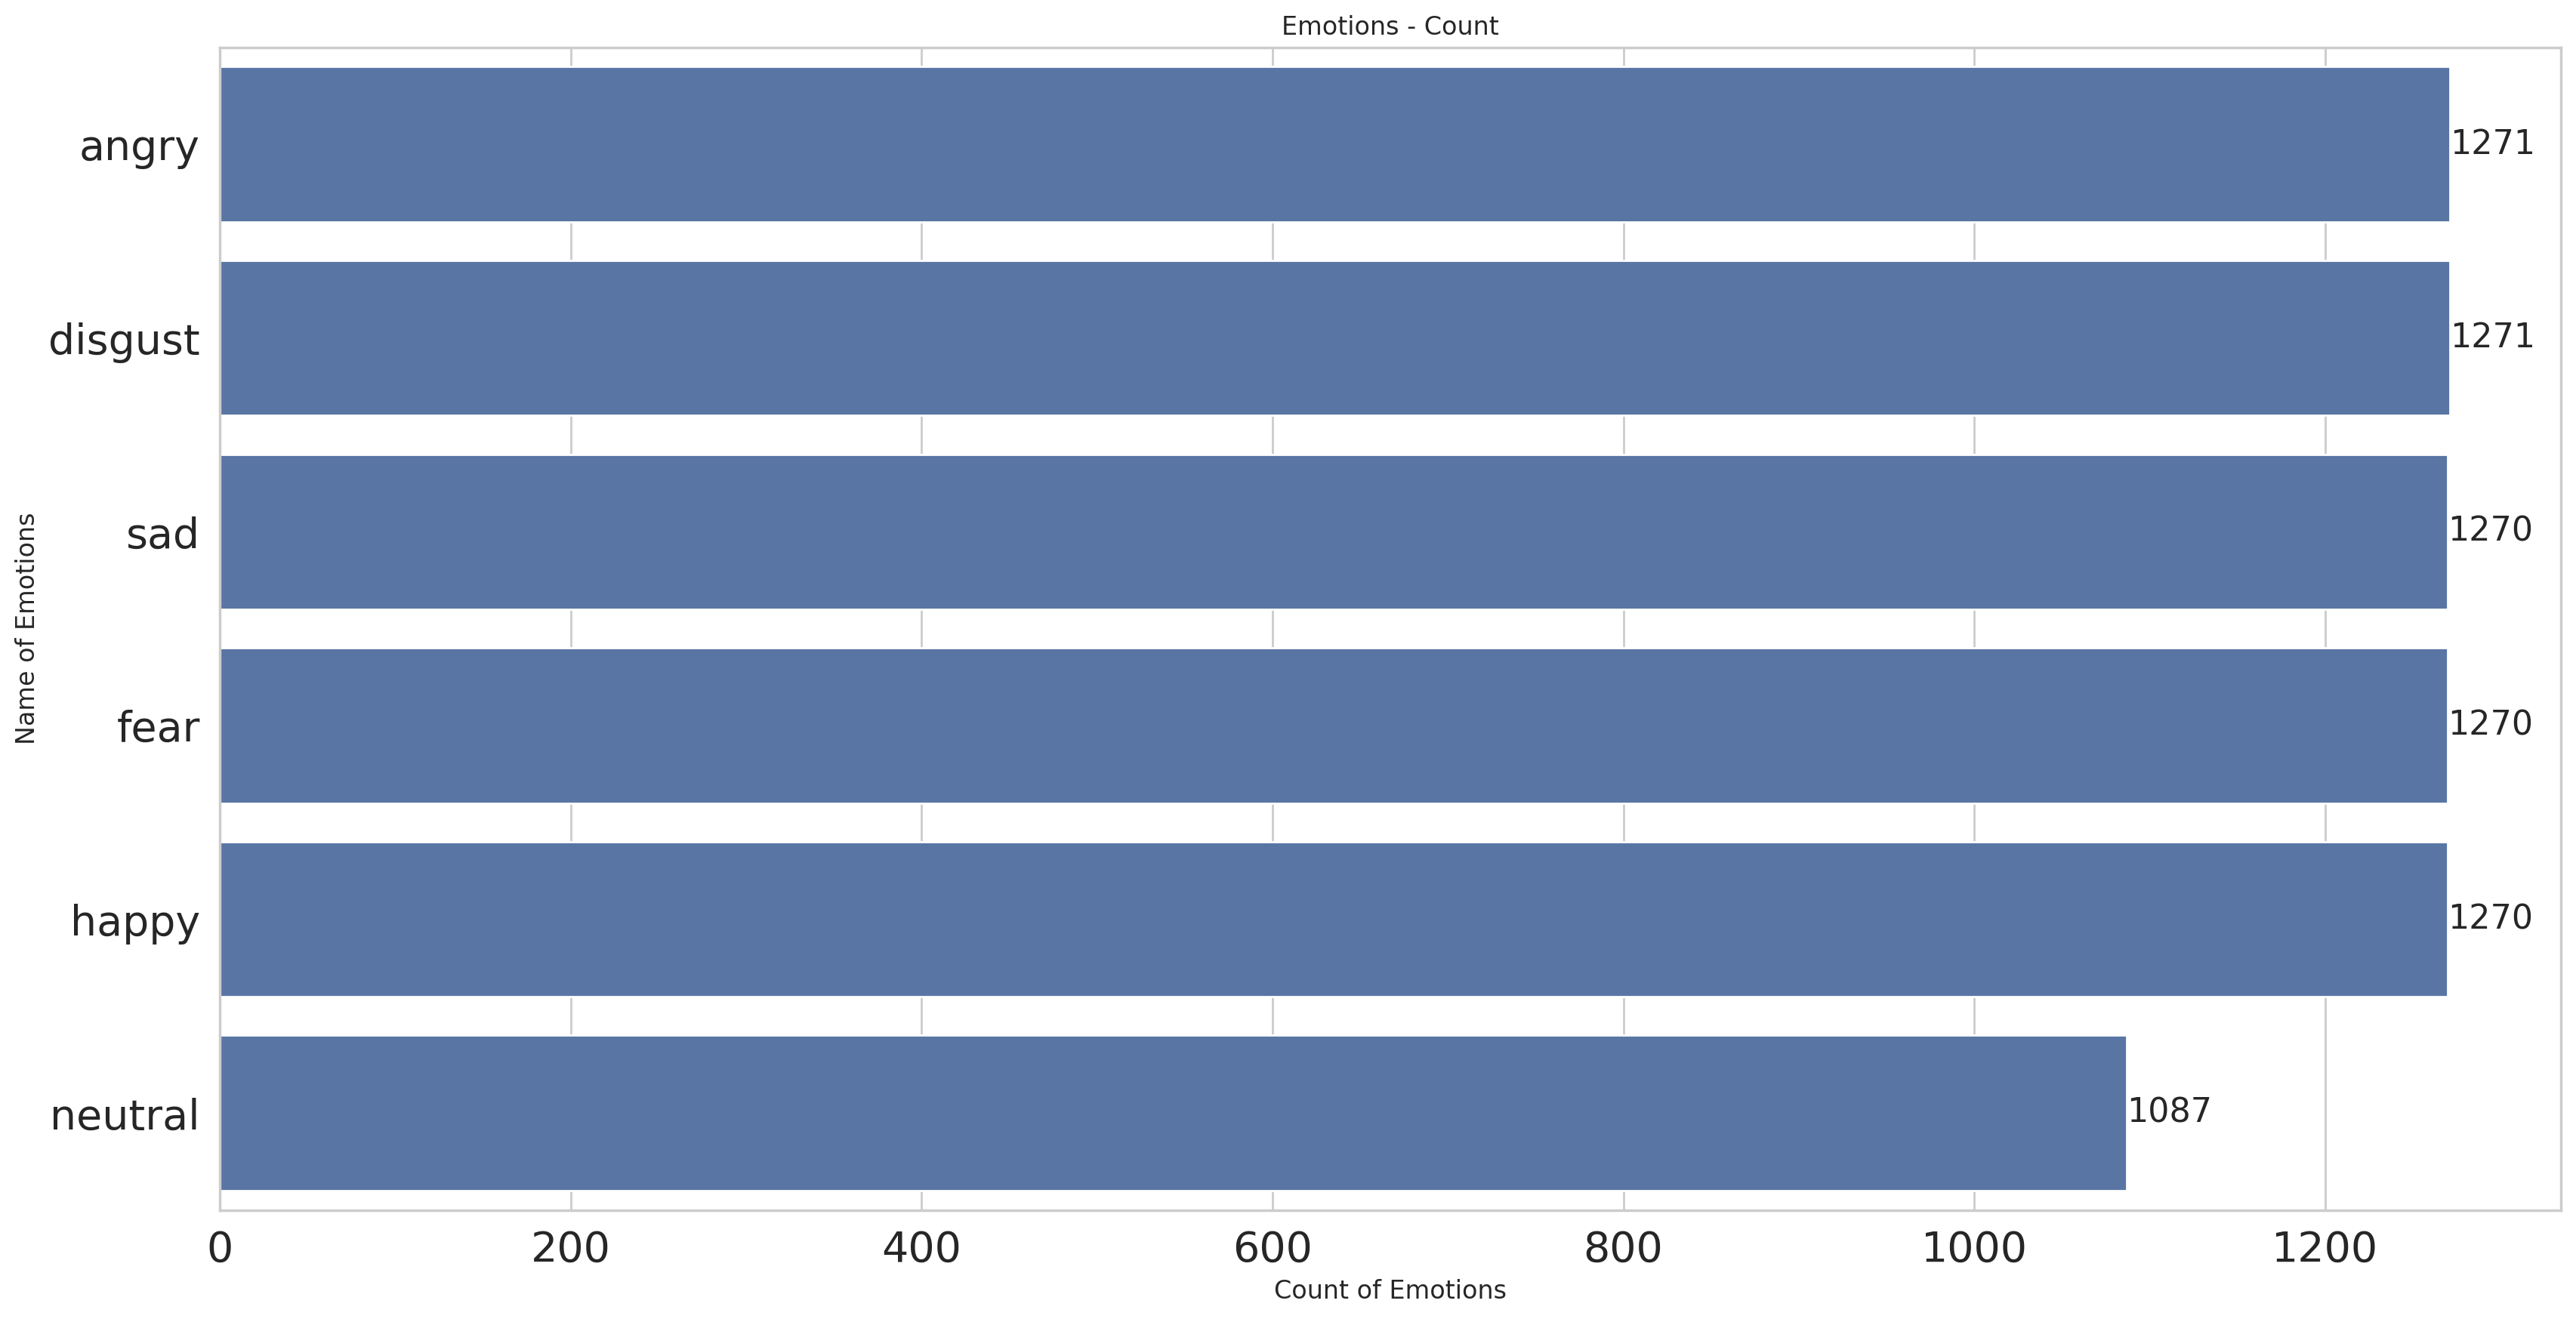

In [8]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index )
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions" )
plt.xlabel("Count of Emotions" )
plt.title("Emotions - Count" )
plt.show()

# Ravdees

In [9]:
Ravdess_dir_list[:10]

['Actor_04',
 'Actor_03',
 'Actor_09',
 'Actor_05',
 'Actor_01',
 'Actor_08',
 'Actor_06',
 'Actor_02',
 'Actor_07',
 'Actor_19']

In [10]:
emotions_ravdess = []
ravdess_path = []

for x in Ravdess_dir_list:
  actor_path = path_ravdees + x
  files = os.listdir(actor_path)

  for f in files:
    part = f.split('.')[0].split('-')
    emotions_ravdess.append(int(part[2]))
    ravdess_path.append(actor_path + '/' + f)


ravdess_df = pd.DataFrame({'Emotions': emotions_ravdess, 'Path': ravdess_path})

print(ravdess_df.head())

   Emotions                                               Path
0         1  /content/drive/MyDrive/Data/Data_speech/audio_...
1         1  /content/drive/MyDrive/Data/Data_speech/audio_...
2         2  /content/drive/MyDrive/Data/Data_speech/audio_...
3         2  /content/drive/MyDrive/Data/Data_speech/audio_...
4         2  /content/drive/MyDrive/Data/Data_speech/audio_...


In [11]:
ravdess_df['Emotions'].unique()

array([1, 2, 5, 7, 6, 4, 3, 8])

In [12]:
ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

<ipython-input-12-fb2ccbf1d777>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'calm',


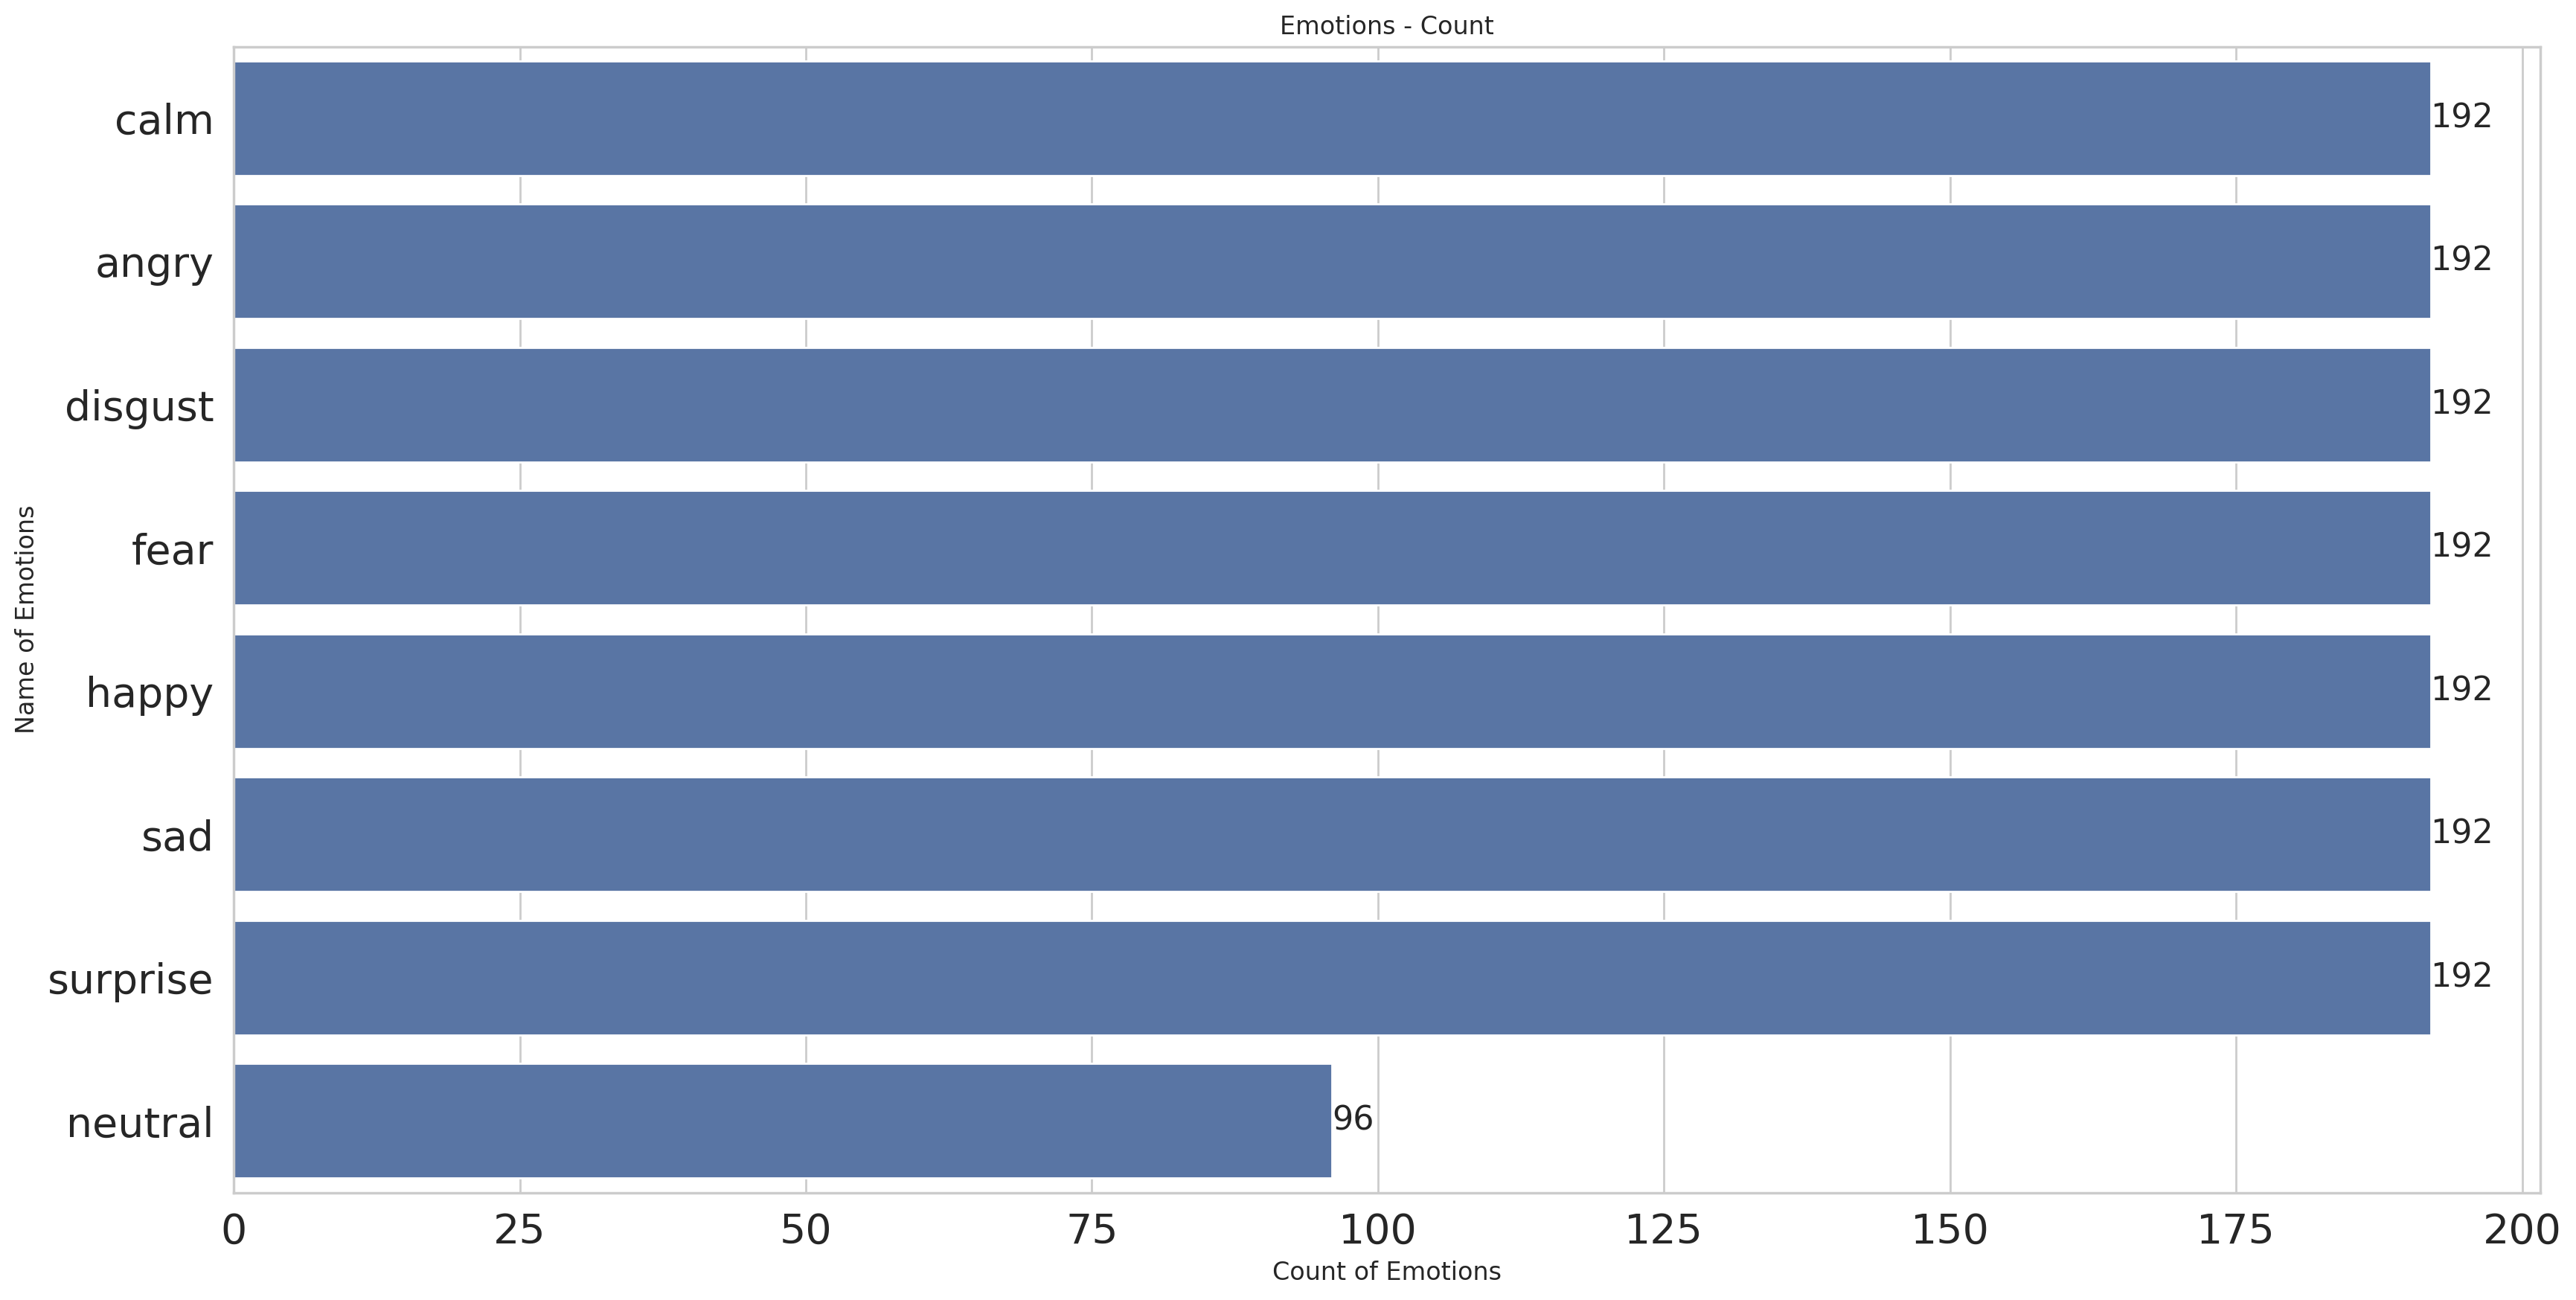

In [13]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index )
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions" )
plt.xlabel("Count of Emotions" )
plt.title("Emotions - Count" )
plt.show()

# Savee

In [14]:
Savee_dir_list[:10]

['DC_d07.wav',
 'DC_a05.wav',
 'DC_a12.wav',
 'DC_a07.wav',
 'DC_a02.wav',
 'DC_d02.wav',
 'DC_d05.wav',
 'DC_d09.wav',
 'DC_d04.wav',
 'DC_a15.wav']

In [15]:
from re import X
emotions_savee = []
path_savee = []

for x in Savee_dir_list:
  path_savee.append(path_Savee + x)
  part = x.split('_')[1]
  part = part[:-6]
  if part == 'a':
      emotions_savee.append('angry')
  elif part == 'd':
      emotions_savee.append('disgust')
  elif part == 'f':
      emotions_savee.append('fear')
  elif part == 'h':
      emotions_savee.append('happiness')
  elif part == 'n':
      emotions_savee.append('neutral')
  elif part == 'sa':
      emotions_savee.append('sadness')
  elif part == 'su':
      emotions_savee.append('surprise')

  else:
      emotions_savee.append('Unknown')


emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)

In [16]:
Savee_df.head()

Emotions                                               Path
0  disgust  /content/drive/MyDrive/Data/Data_speech/Savee/...
1    angry  /content/drive/MyDrive/Data/Data_speech/Savee/...
2    angry  /content/drive/MyDrive/Data/Data_speech/Savee/...
3    angry  /content/drive/MyDrive/Data/Data_speech/Savee/...
4    angry  /content/drive/MyDrive/Data/Data_speech/Savee/...

In [17]:
Savee_df['Emotions'].unique()


array(['disgust', 'angry', 'neutral', 'happiness', 'fear', 'surprise',
       'sadness'], dtype=object)

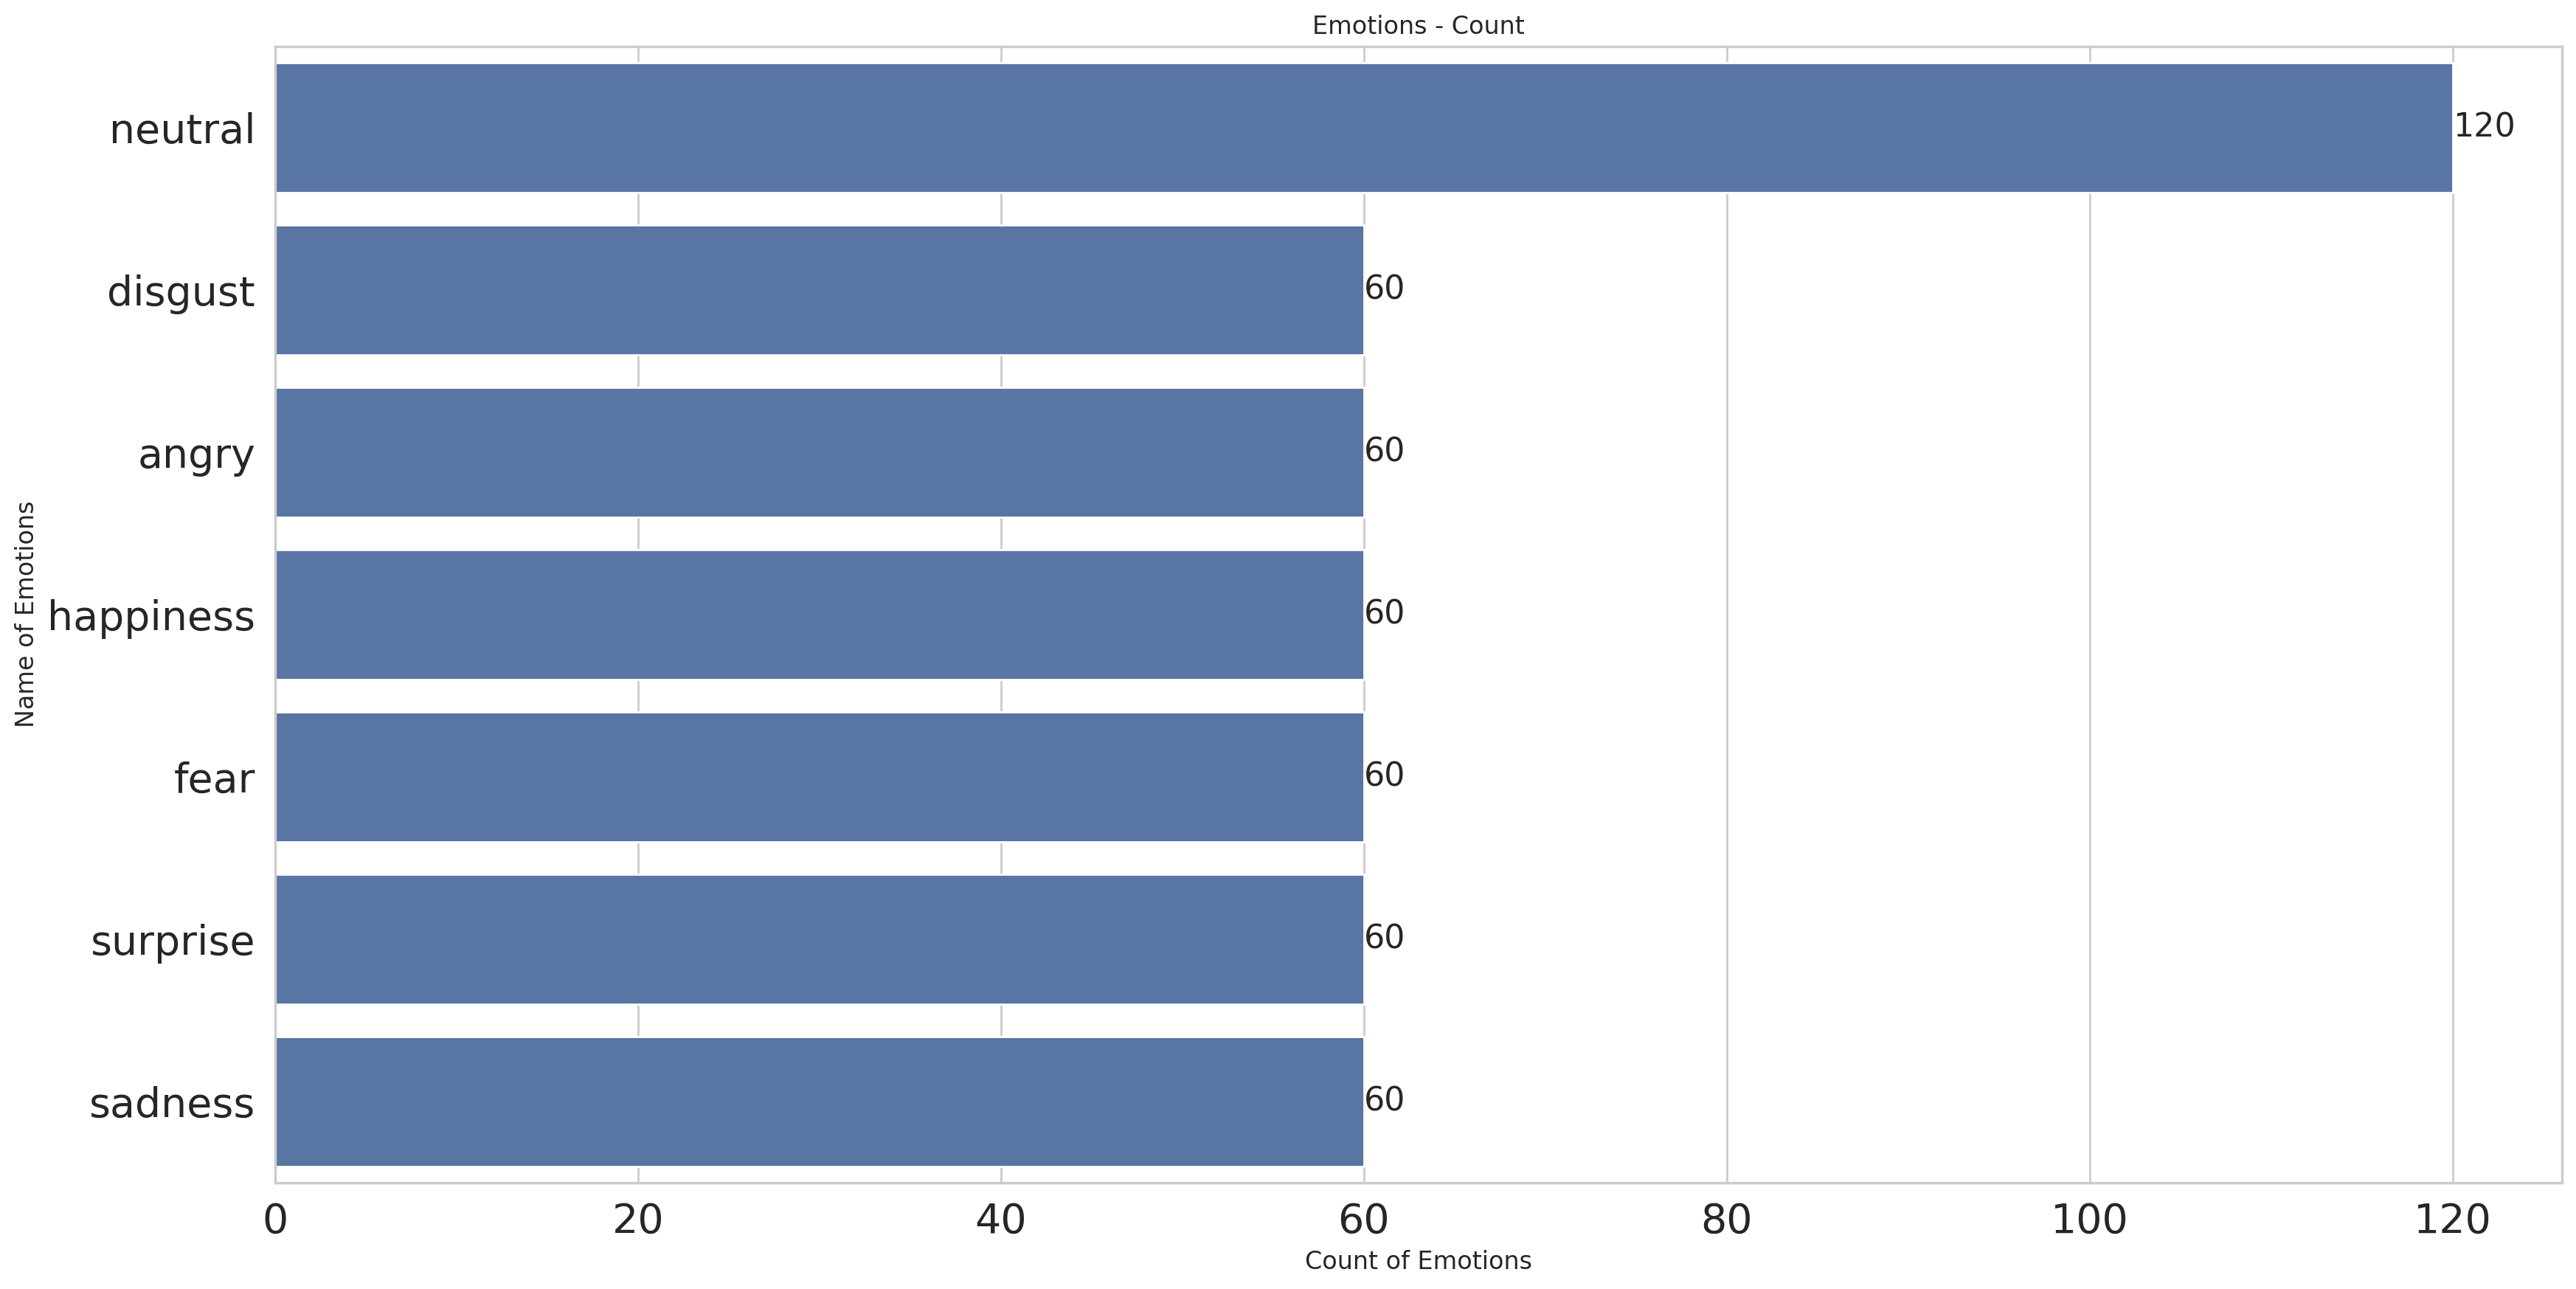

In [18]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index )
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions" )
plt.xlabel("Count of Emotions" )
plt.title("Emotions - Count" )
plt.show()

# Tess

In [19]:
Tess_dir_list[:10]

['OAF_Fear',
 'OAF_angry',
 'OAF_happy',
 'OAF_Sad',
 'OAF_Pleasant_surprise',
 'OAF_disgust',
 'YAF_fear',
 'YAF_neutral',
 'OAF_neutral',
 'YAF_happy']

In [20]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(path_Tess + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(path_Tess + it + '/' + file)

emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head()

Emotions                                               Path
0      fear  /content/drive/MyDrive/Data/Data_speech/Tess/O...
1      fear  /content/drive/MyDrive/Data/Data_speech/Tess/O...
2      fear  /content/drive/MyDrive/Data/Data_speech/Tess/O...
3  fear (1)  /content/drive/MyDrive/Data/Data_speech/Tess/O...
4      fear  /content/drive/MyDrive/Data/Data_speech/Tess/O...

In [21]:
emotion_tess_df['Emotions'].unique()

array(['fear', 'fear (1)', 'angry', 'angry (1)', 'happy', 'sad',
       'surprise', 'disgust', 'disgust (1)', 'neutral', 'neutral (1)',
       'happy (1)', 'ps (1)'], dtype=object)

In [22]:
Tess_df['Emotions'] =Tess_df['Emotions'].str.replace(r'\s*\(1\)', '', regex=True)

In [23]:
Tess_df['Emotions'].unique()

array(['fear', 'angry', 'happy', 'sad', 'surprise', 'disgust', 'neutral',
       'ps'], dtype=object)

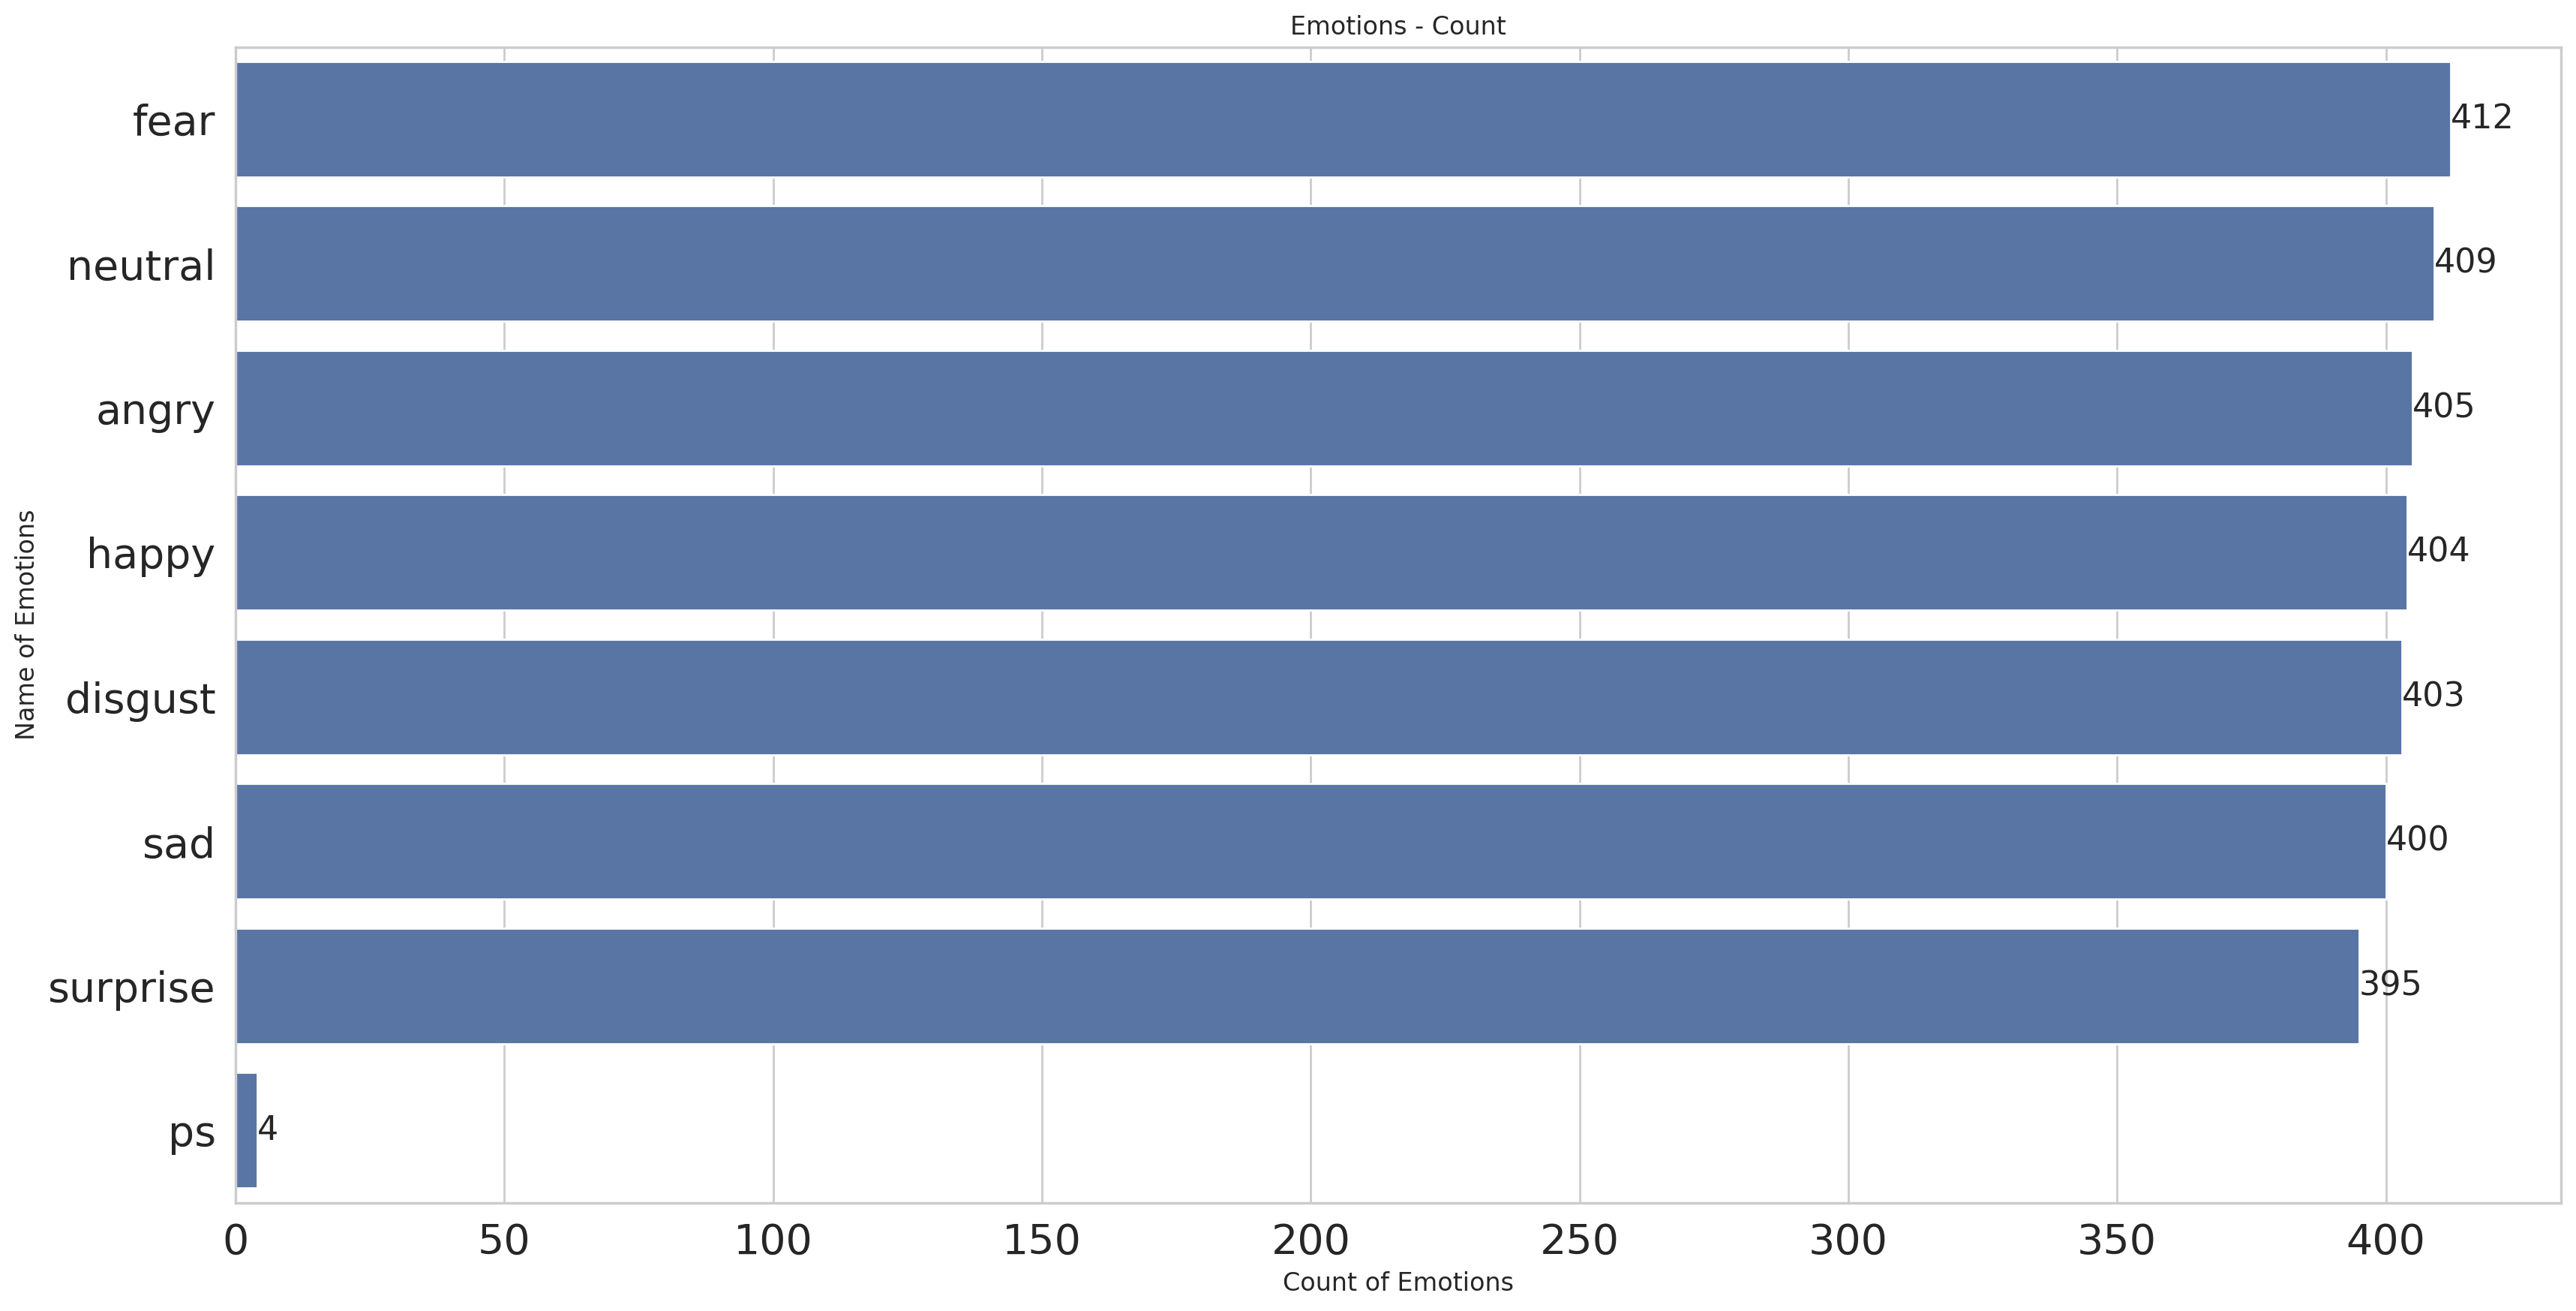

In [24]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions" )
plt.xlabel("Count of Emotions" )
plt.title("Emotions - Count" )
plt.show()

## Dataframe

In [25]:
df = pd.concat([crema_df,ravdess_df, Savee_df, Tess_df], axis = 0)


In [26]:
df.to_csv("All_df.csv",index=False)
df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/Data/Data_speech/Crema/...
1  neutral  /content/drive/MyDrive/Data/Data_speech/Crema/...
2  disgust  /content/drive/MyDrive/Data/Data_speech/Crema/...
3     fear  /content/drive/MyDrive/Data/Data_speech/Crema/...
4      sad  /content/drive/MyDrive/Data/Data_speech/Crema/...

In [27]:
df['Emotions'].unique()

array(['angry', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'calm',
       'surprise', 'happiness', 'sadness', 'ps'], dtype=object)

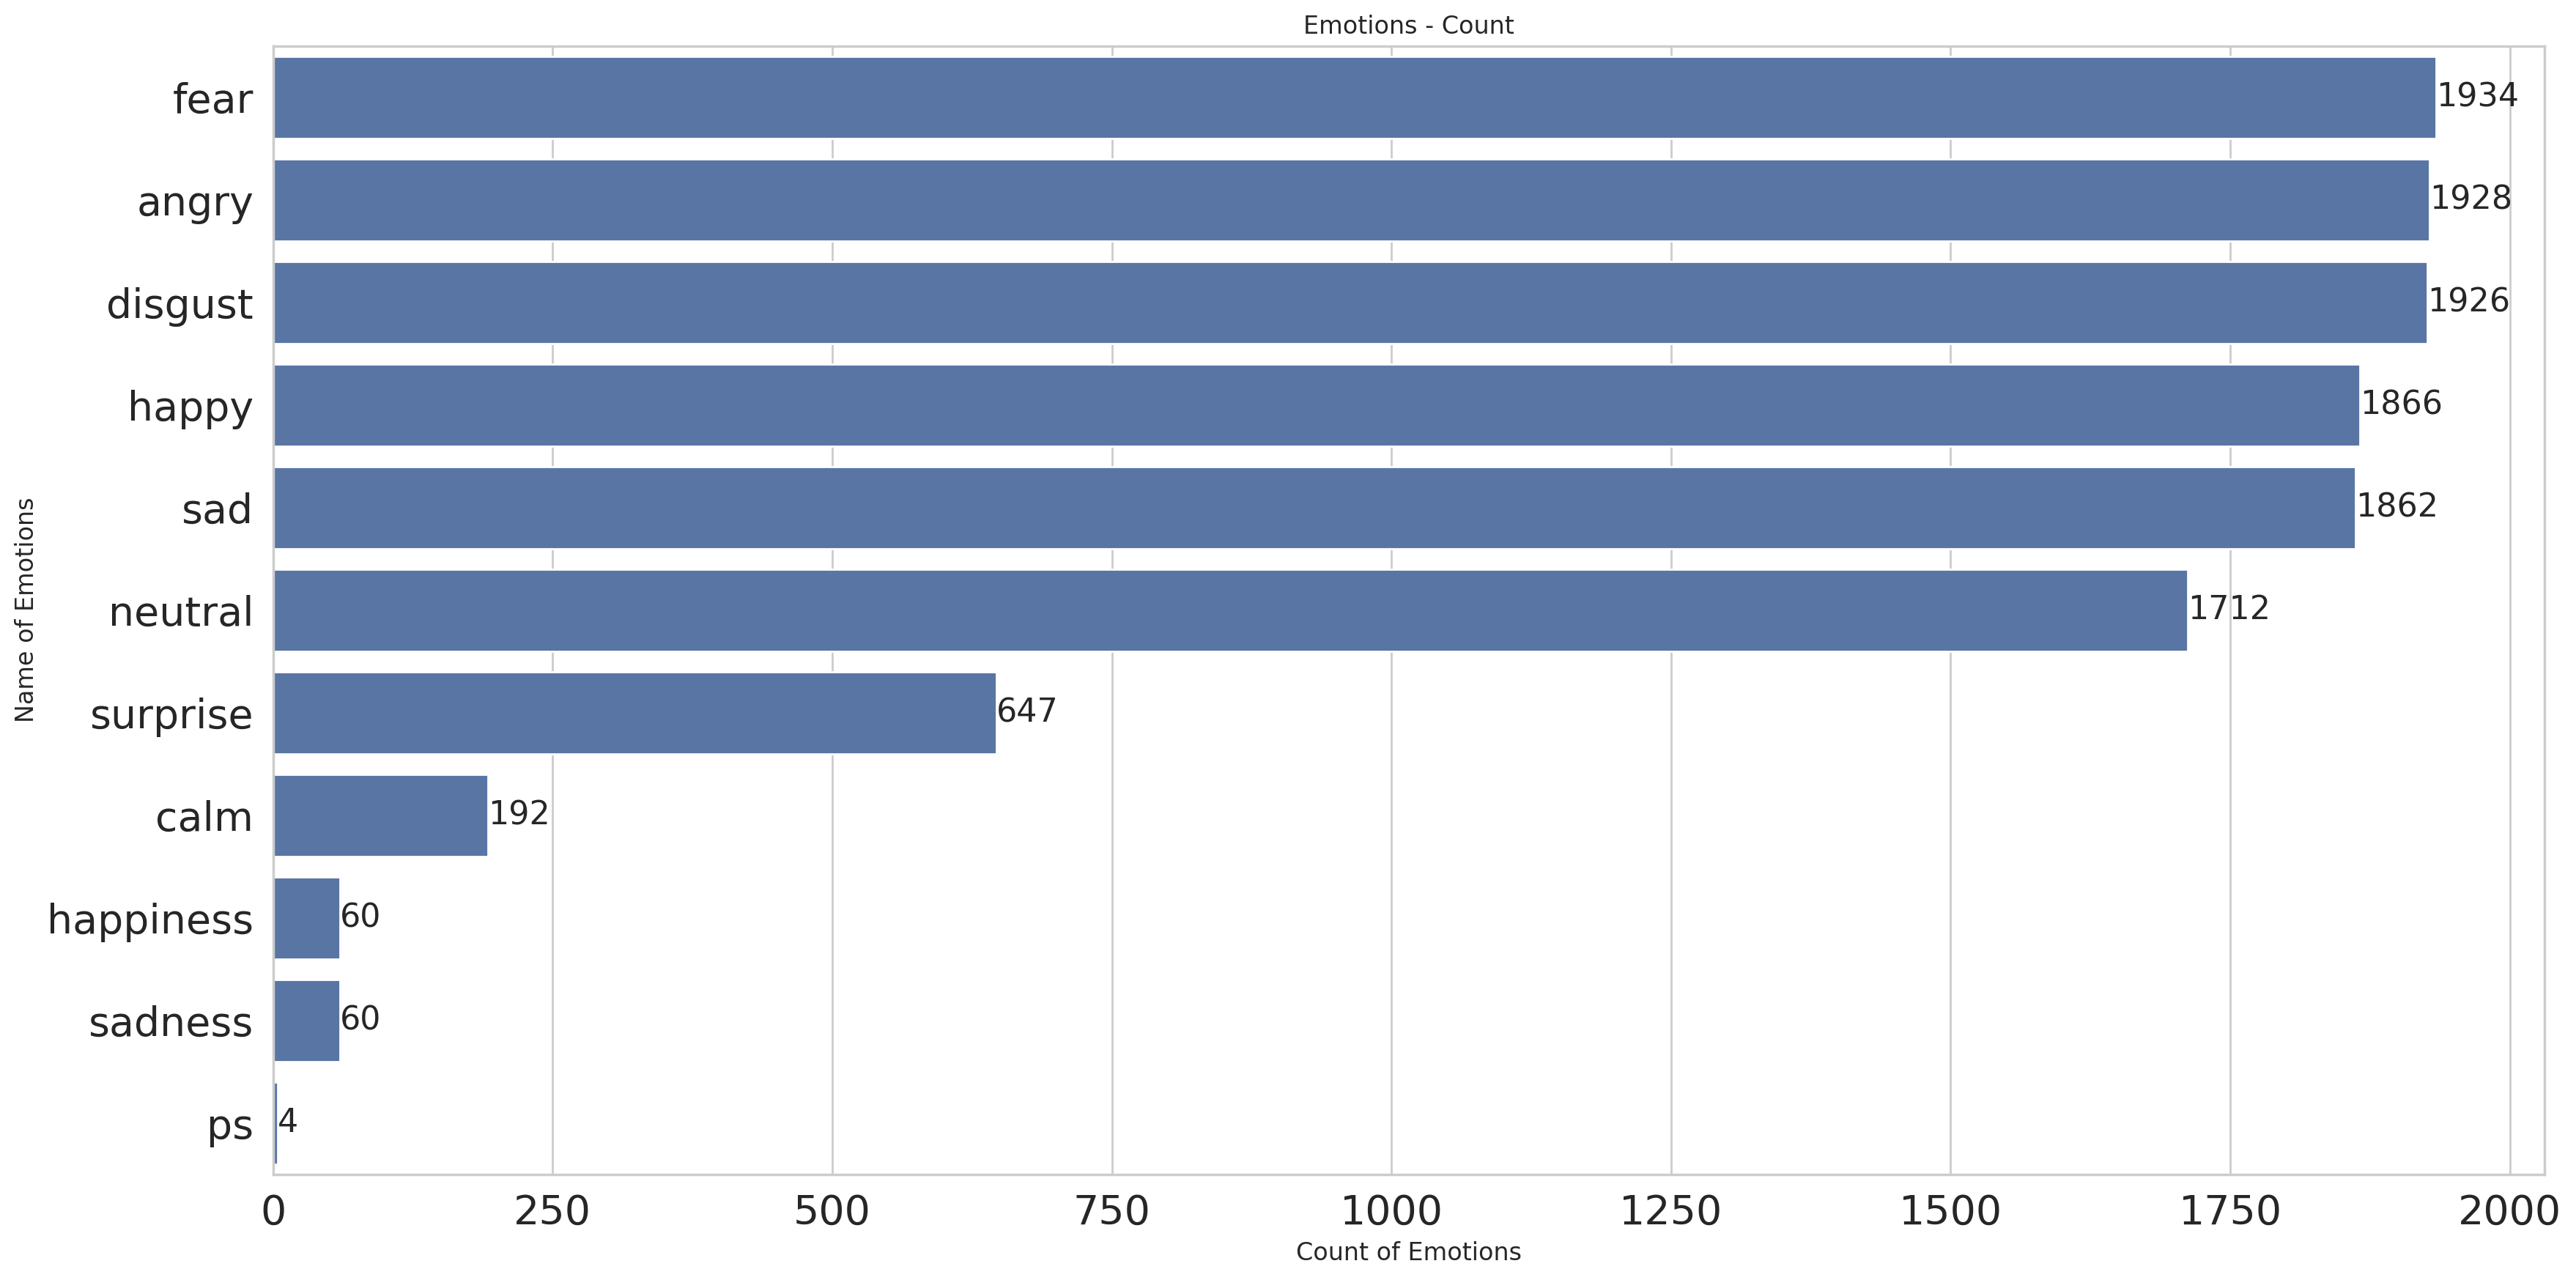

In [28]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index )
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions" )
plt.xlabel("Count of Emotions" )
plt.title("Emotions - Count" )
plt.show()

In [29]:
df_rep = df
df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
df_rep['Emotions'].replace('calm', 'neutral', inplace=True)
df_rep['Emotions'].replace('ps', 'surprise', inplace=True)

<ipython-input-29-af091c216435>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
<ipython-input-29-af091c216435>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [30]:
df['Emotions'].unique()

array(['angry', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'surprise'],
      dtype=object)

## Waveplot

###Waveforms in Speech Signals
Represent variations in air pressure over time.
Essential for analyzing speech but often need segmentation for detailed study.
###Short-Time Fourier Transform (STFT)
Helps break speech signals into small time segments.
Useful for analyzing phonemes and frequency patterns.
###Quantization: Converting Audio to Digital
Analog-to-digital conversion captures sound as numerical data.
Similar to how a camera captures video frames.
Higher precision depends on sample rate and bit depth.
###Sample Rate (Measured in kHz)
Defines how many samples per second are recorded.
Higher sample rate = better audio resolution.
Common values:
44.1 kHz (44,100 samples/sec) – Standard for music & CDs.
48 kHz – Preferred for movies and high-quality audio.
###Why Higher Sample Rates Matter
More samples = closer recreation of original sound.
48 kHz is ideal for video because it captures a wider dynamic range.

In [31]:
audio_arrays = []

for i in df['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)

df['Arrays'] = audio_arrays

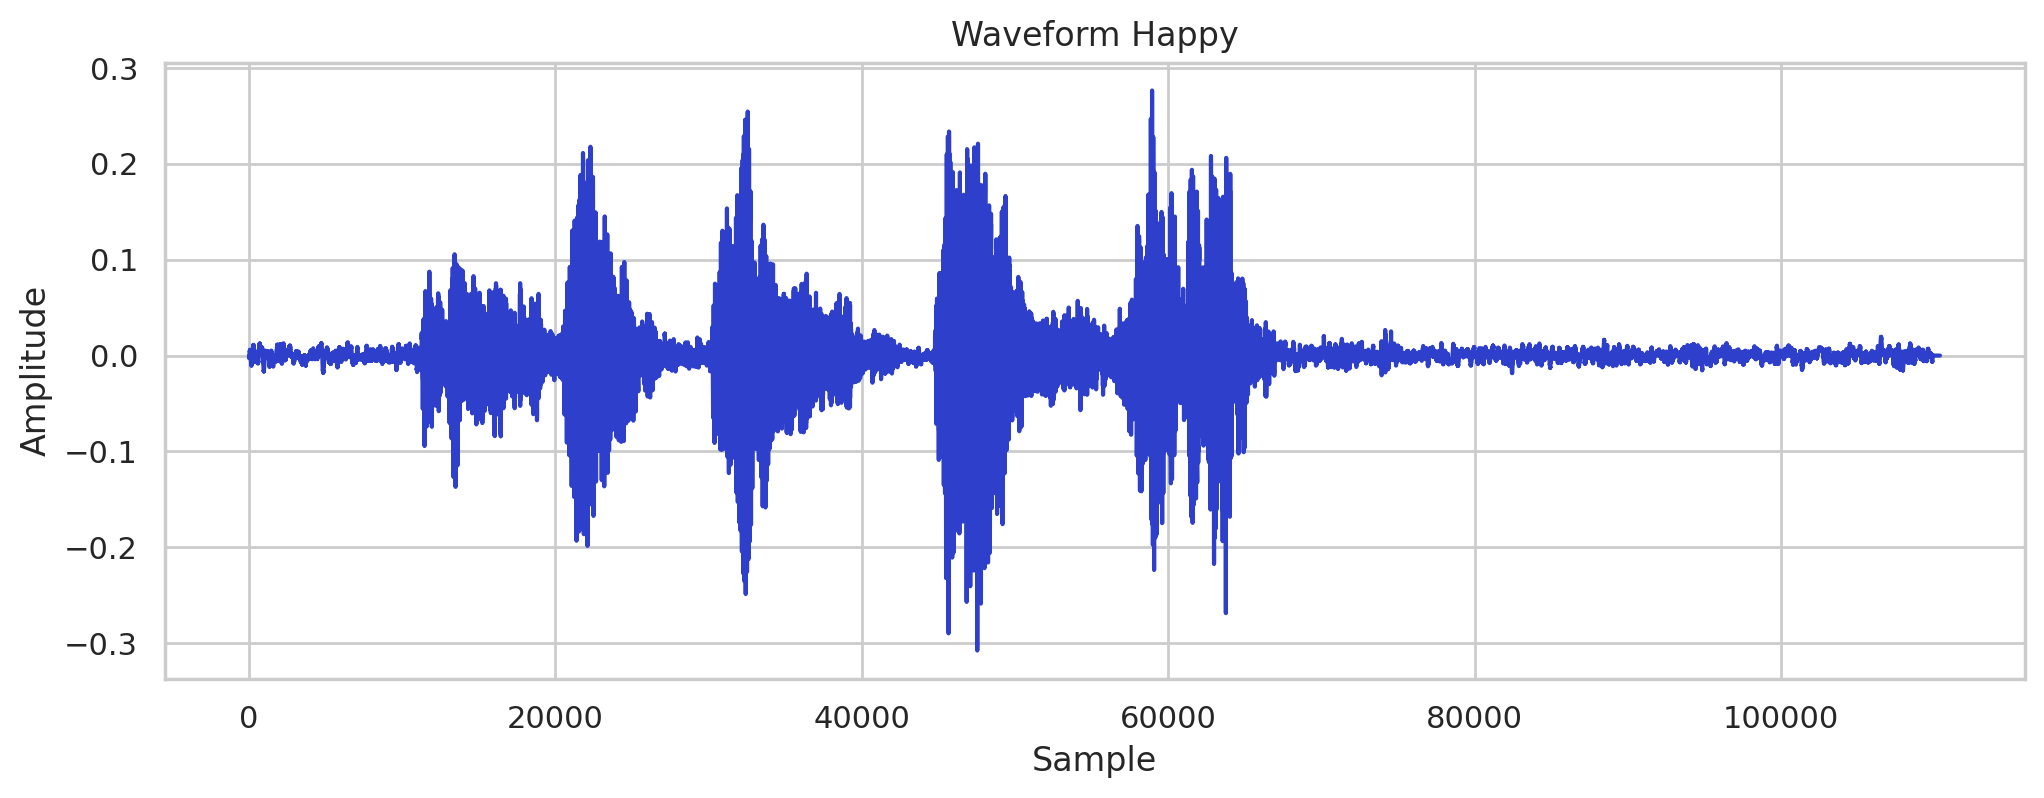

In [32]:
happy_sp = df[df['Emotions'] == 'happy']['Path']
happy_arr = df[df['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform Happy' )
plt.show()

Audio(happy_sp.iloc[0])

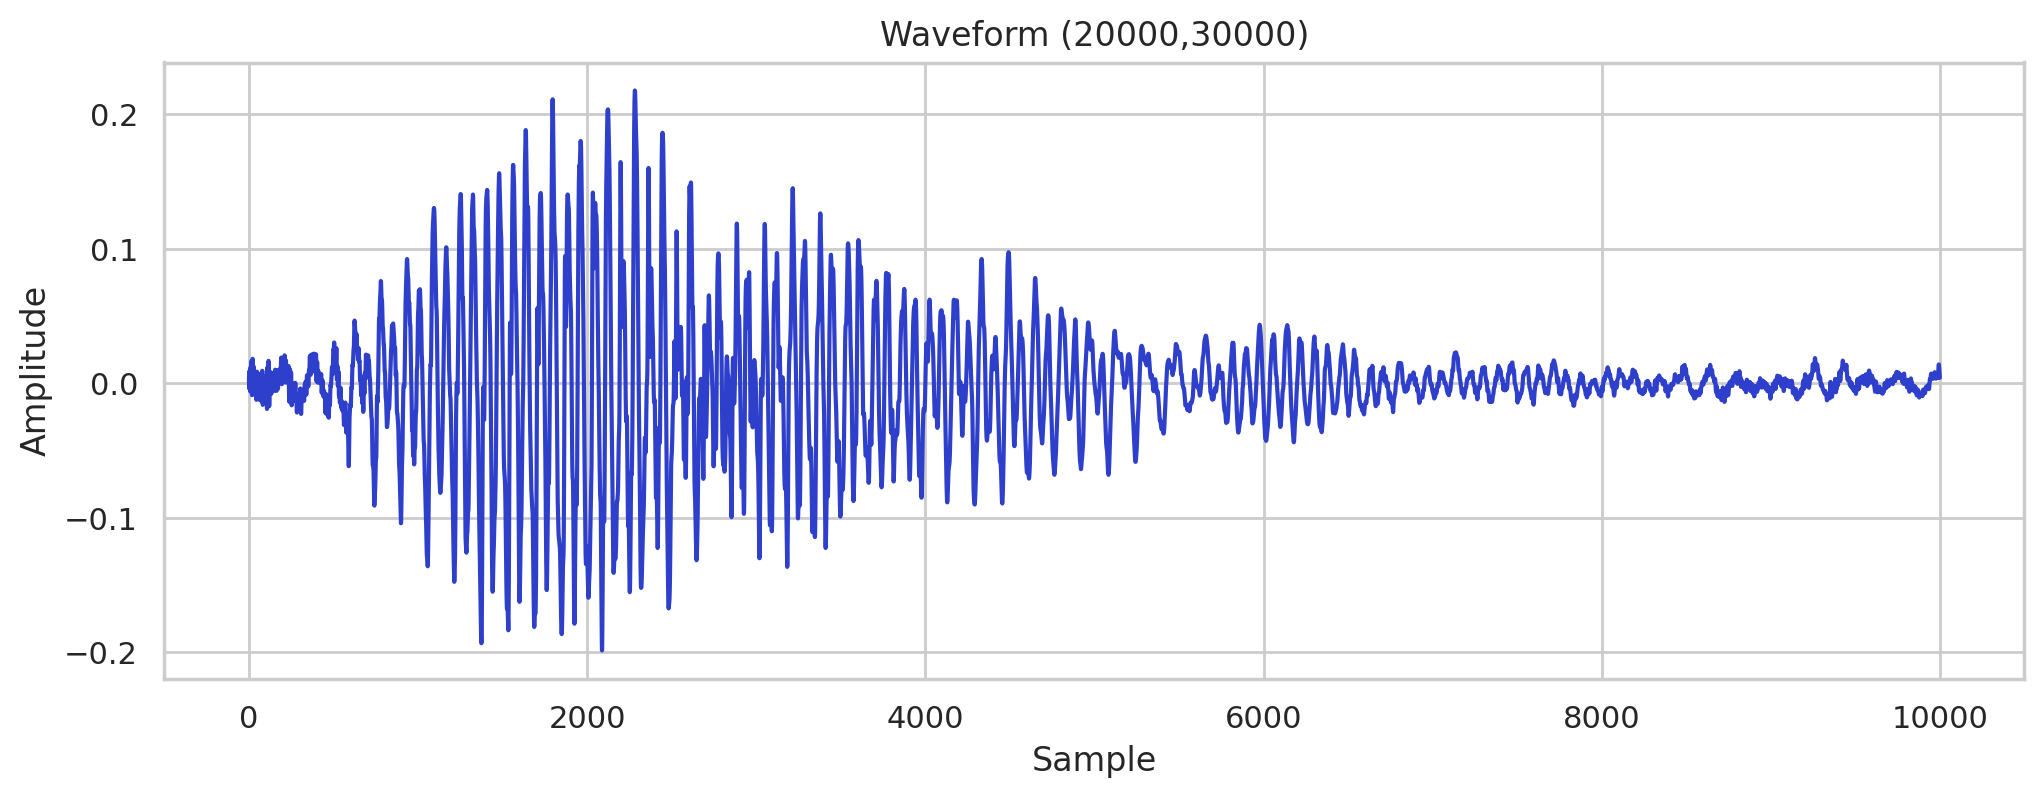

In [33]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform (20000,30000)' )
plt.show()


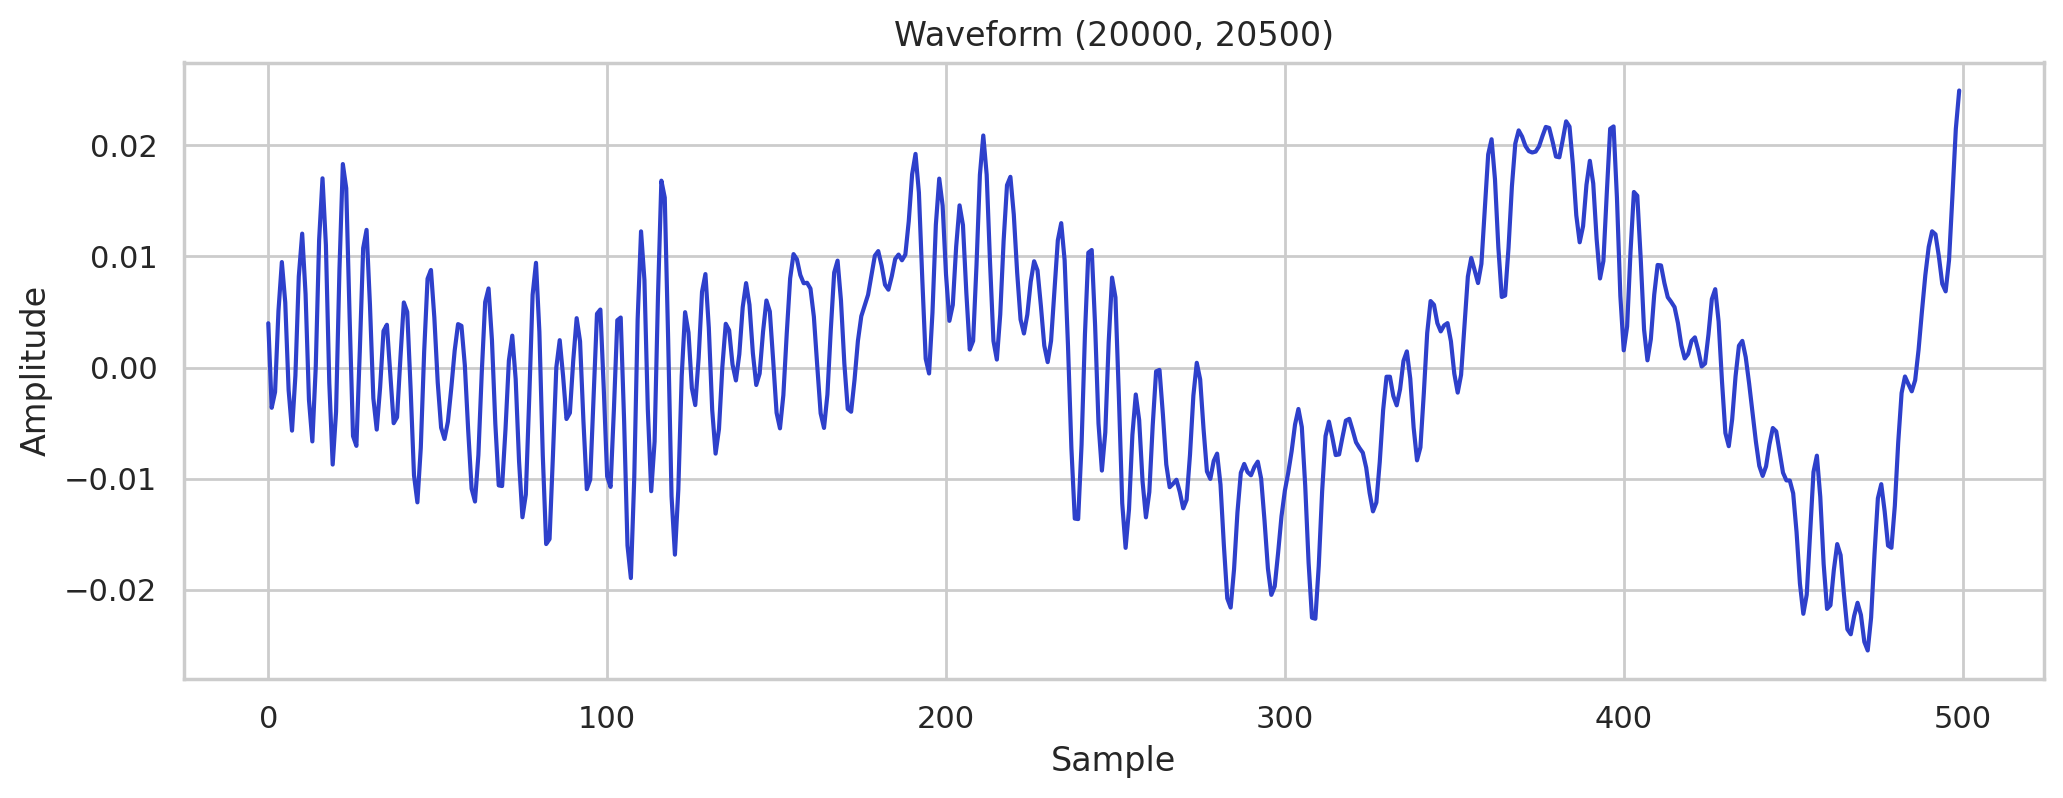

In [34]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude' )
plt.title('Waveform (20000, 20500)' )
plt.show()

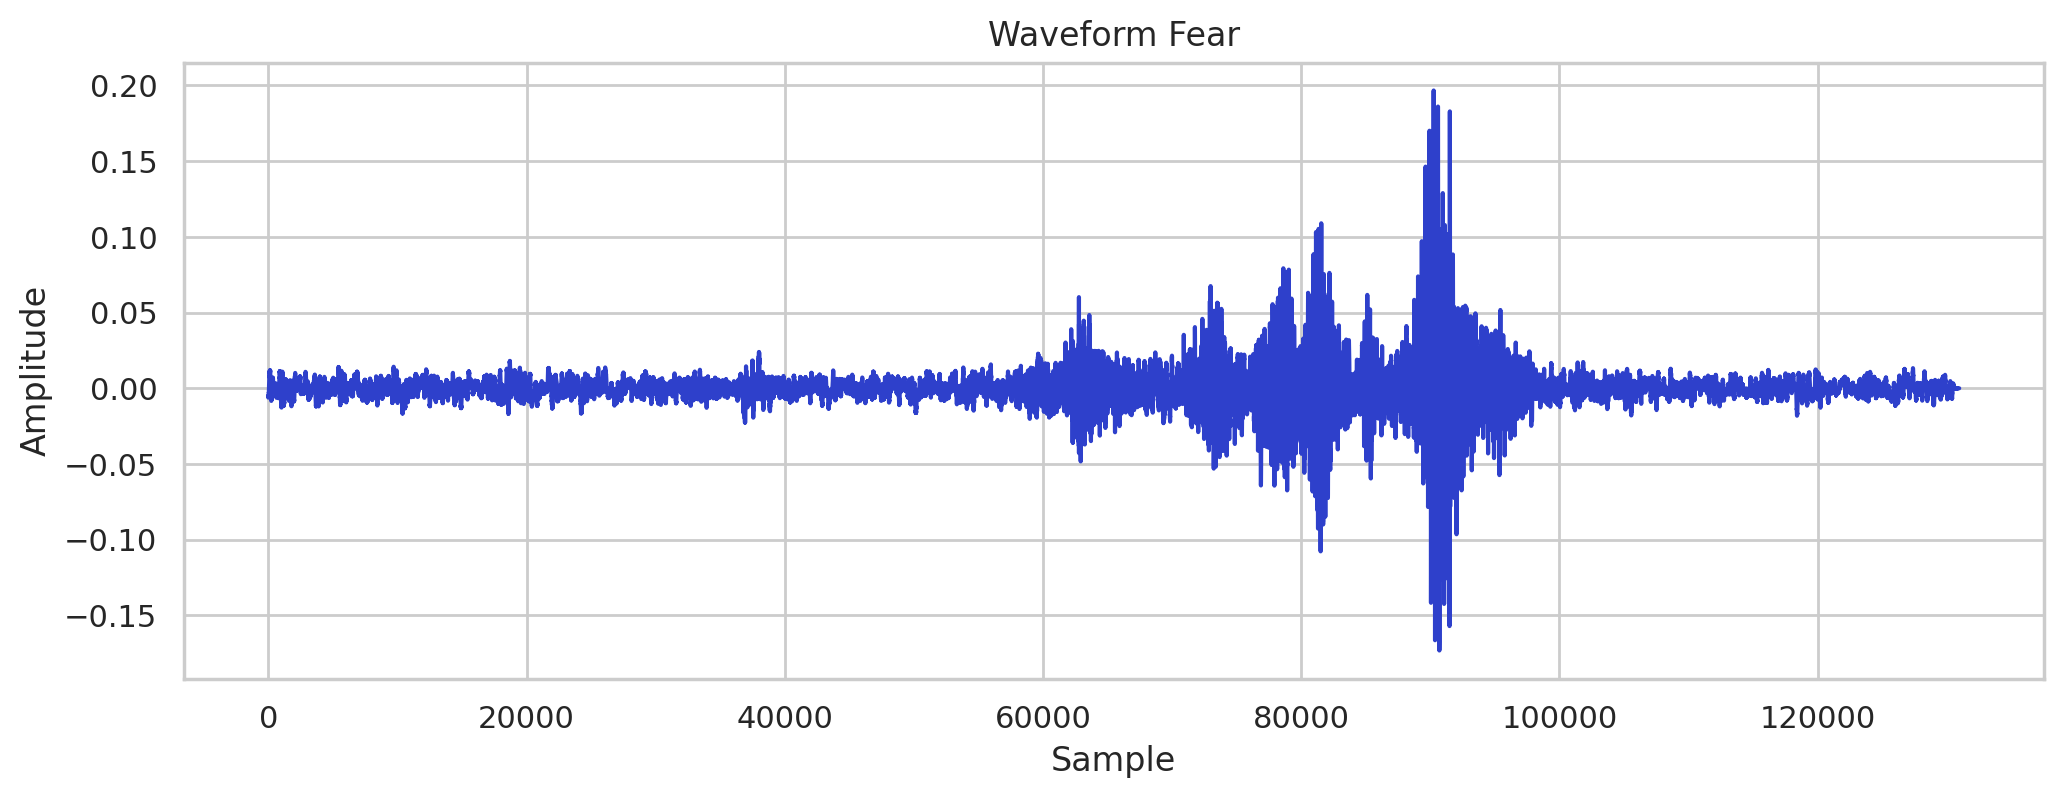

In [35]:
fear_sp = df[df['Emotions'] == 'fear']['Path']
fear_arr = df[df['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude' )
plt.title('Waveform Fear' )
plt.show()

Audio(fear_sp.iloc[0])

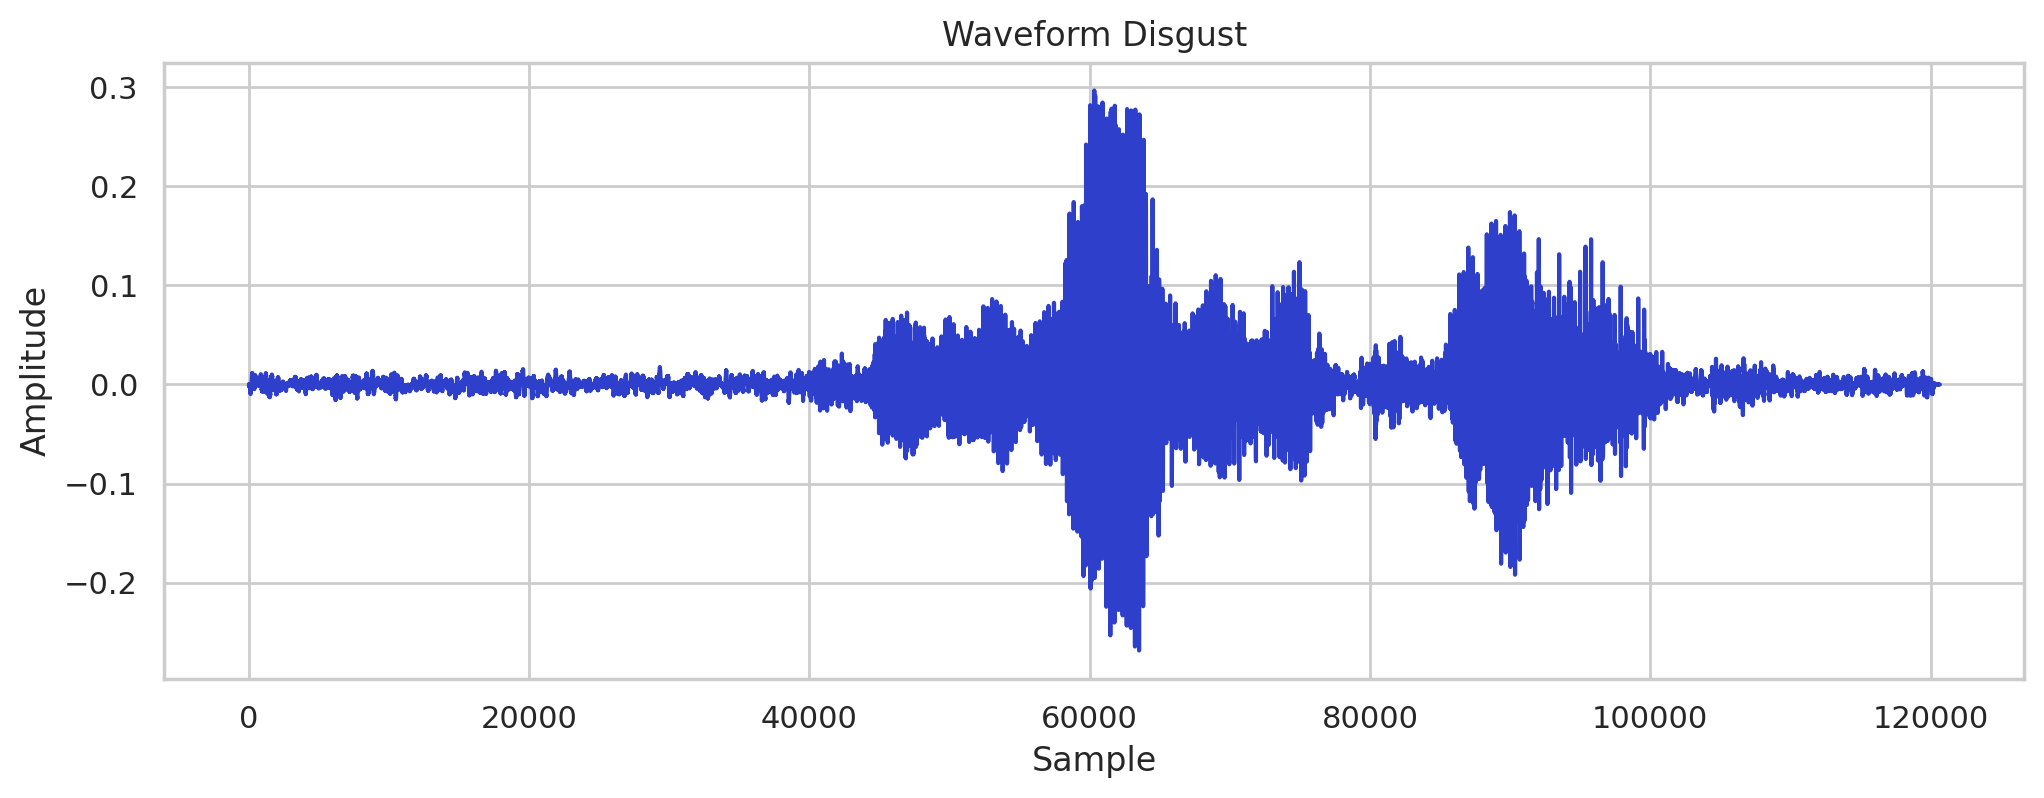

In [36]:
disgust_sp = df[df['Emotions'] == 'disgust']['Path']
disgust_arr = df[df['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform Disgust' )
plt.show()

Audio(disgust_sp.iloc[0])

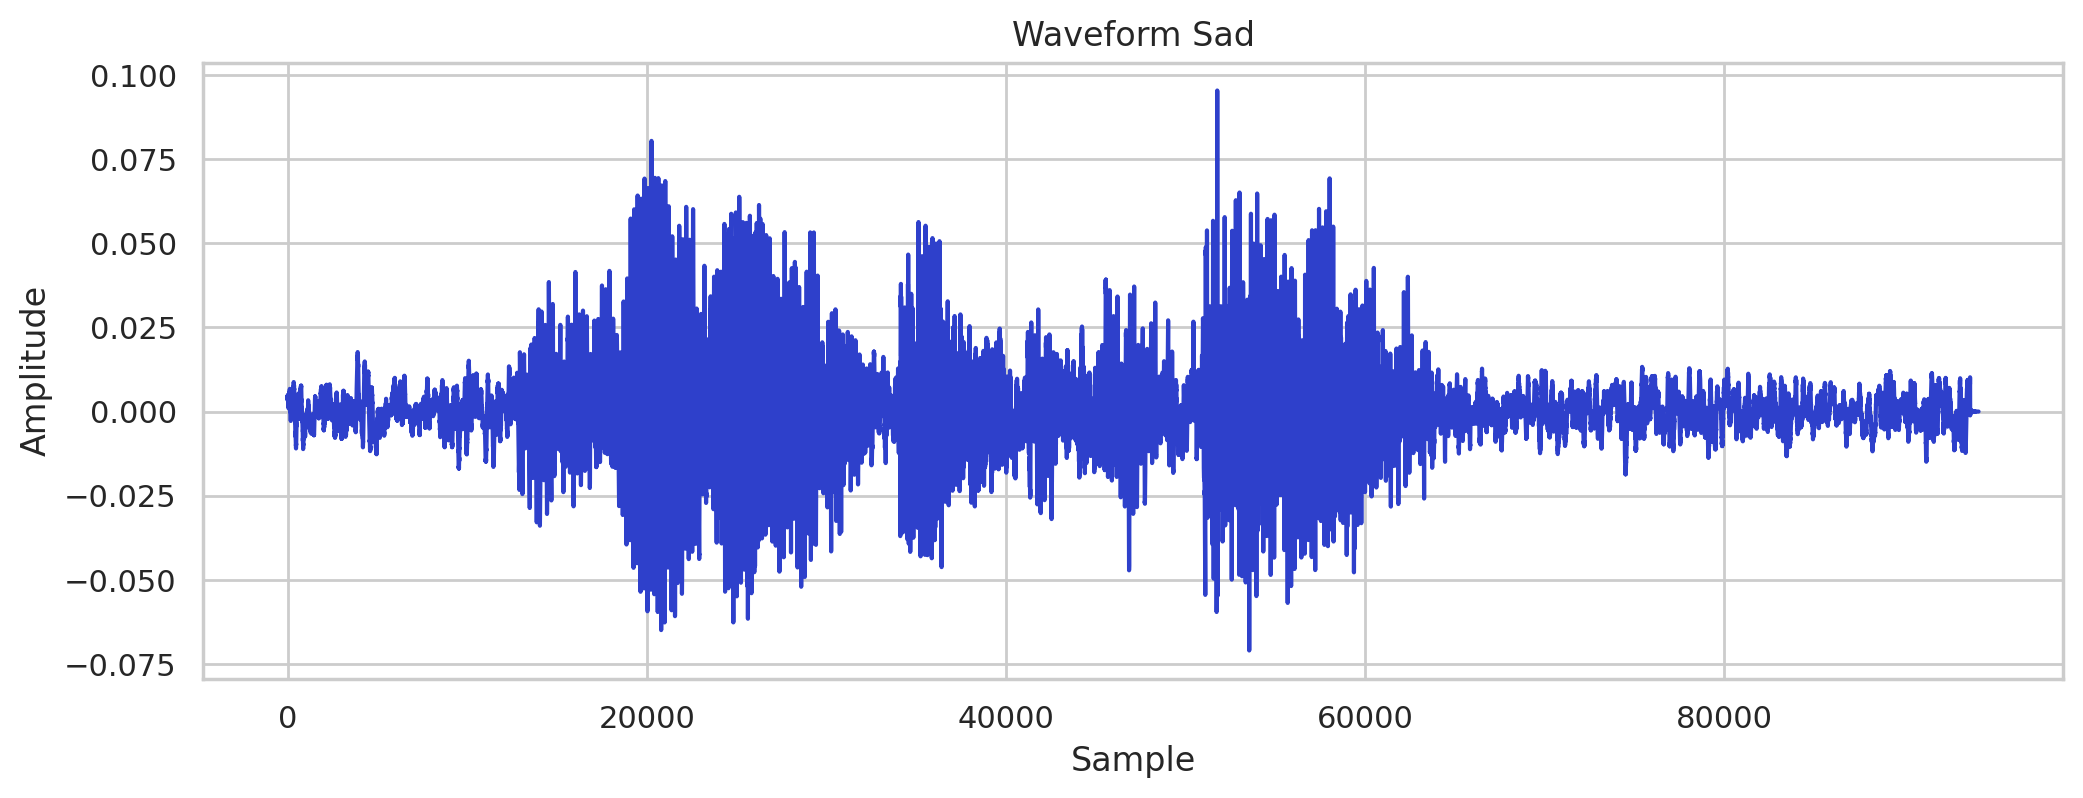

In [37]:
sad_sp = df[df['Emotions'] == 'sad']['Path']
sad_arr = df[df['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude')
plt.title('Waveform Sad')
plt.show()

Audio(sad_sp.iloc[0])

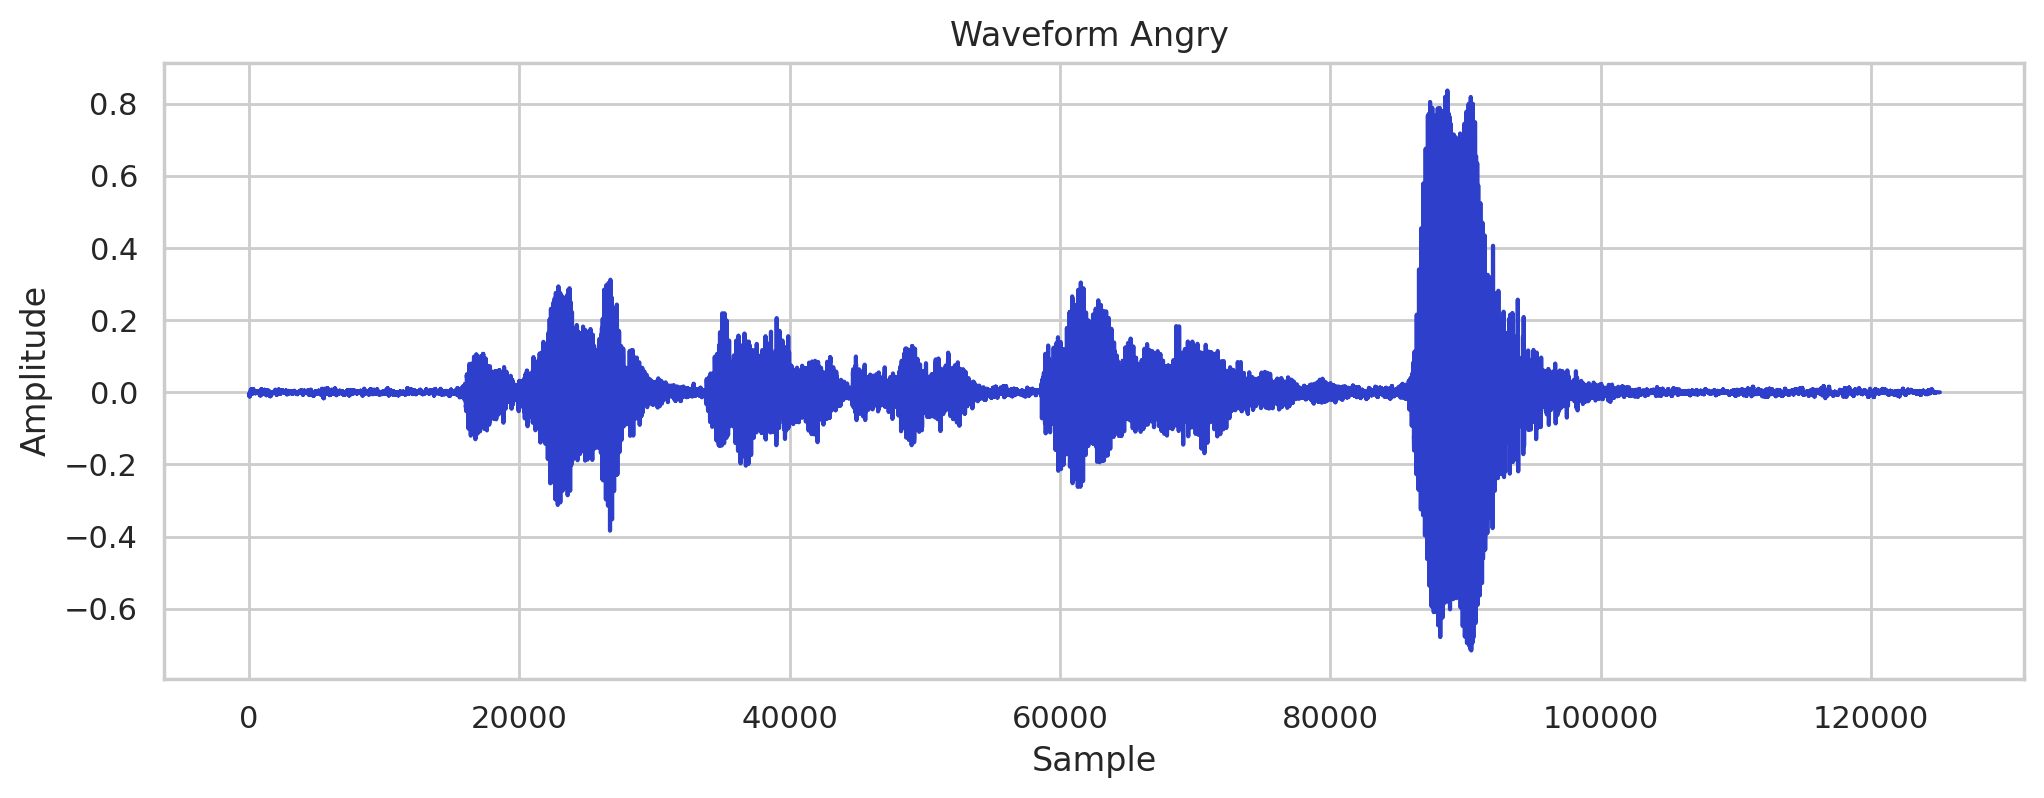

In [38]:
angry_sp = df[df['Emotions'] == 'angry']['Path']
angry_arr = df[df['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform Angry ')
plt.show()

Audio(angry_sp.iloc[0])

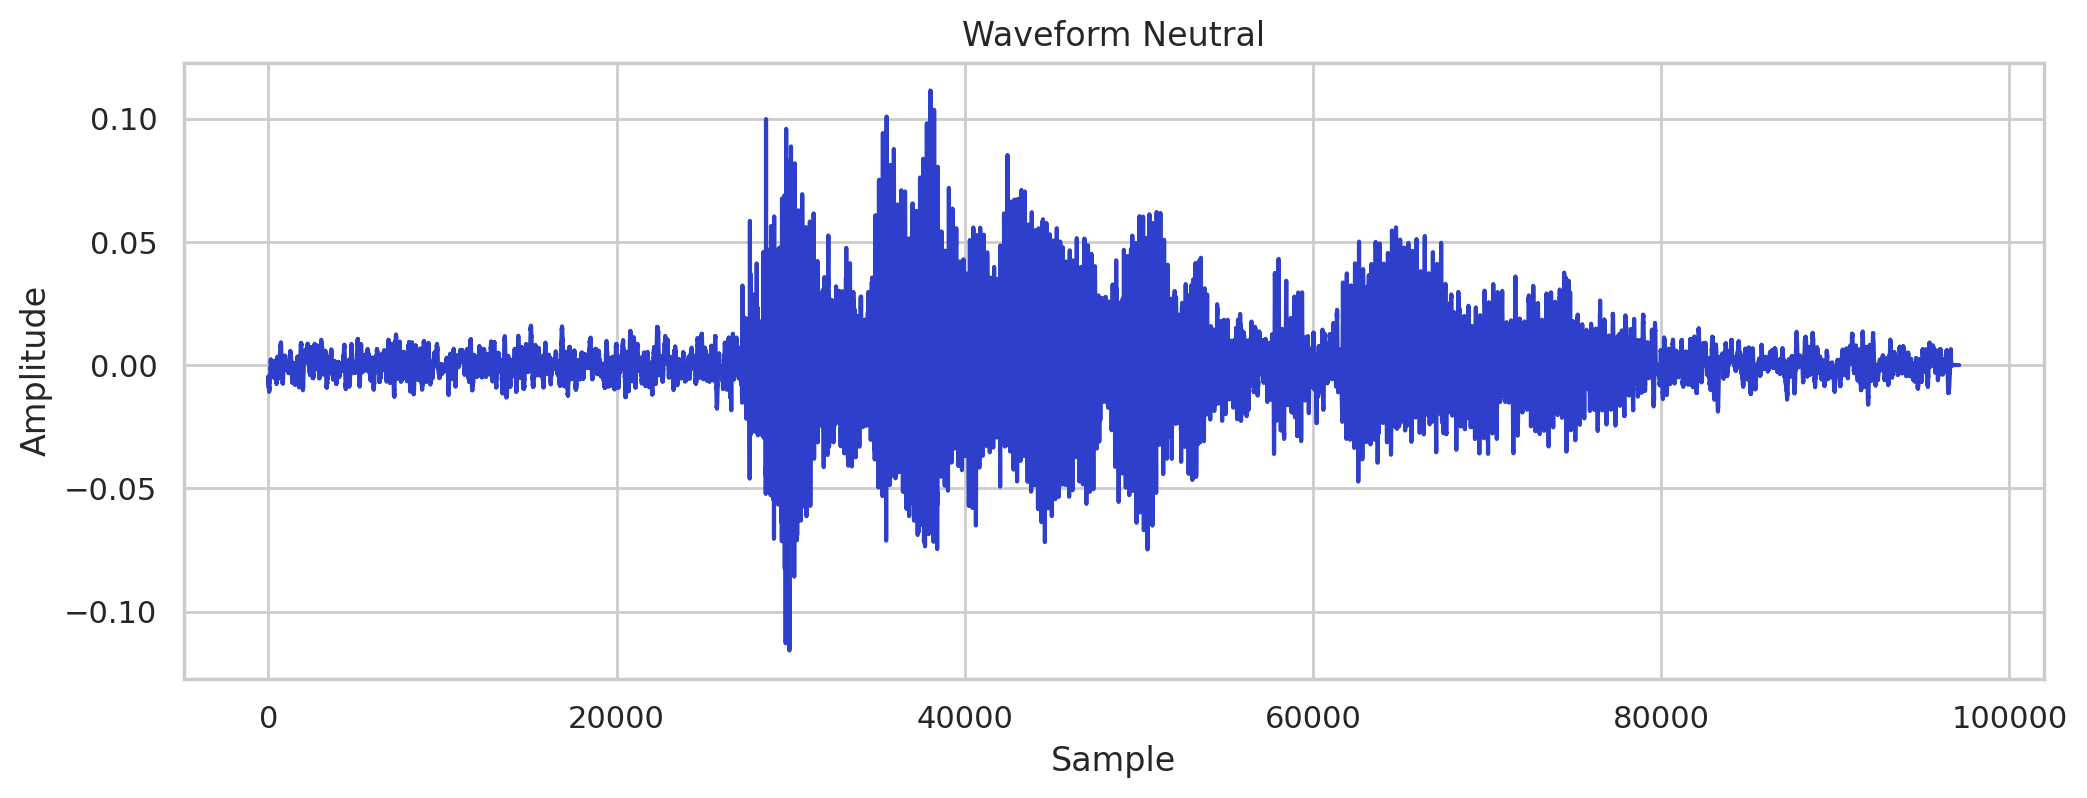

In [39]:
neutral_sp = df[df['Emotions'] == 'neutral']['Path']
neutral_arr = df[df['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform Neutral' )
plt.show()

Audio(neutral_sp.iloc[0])

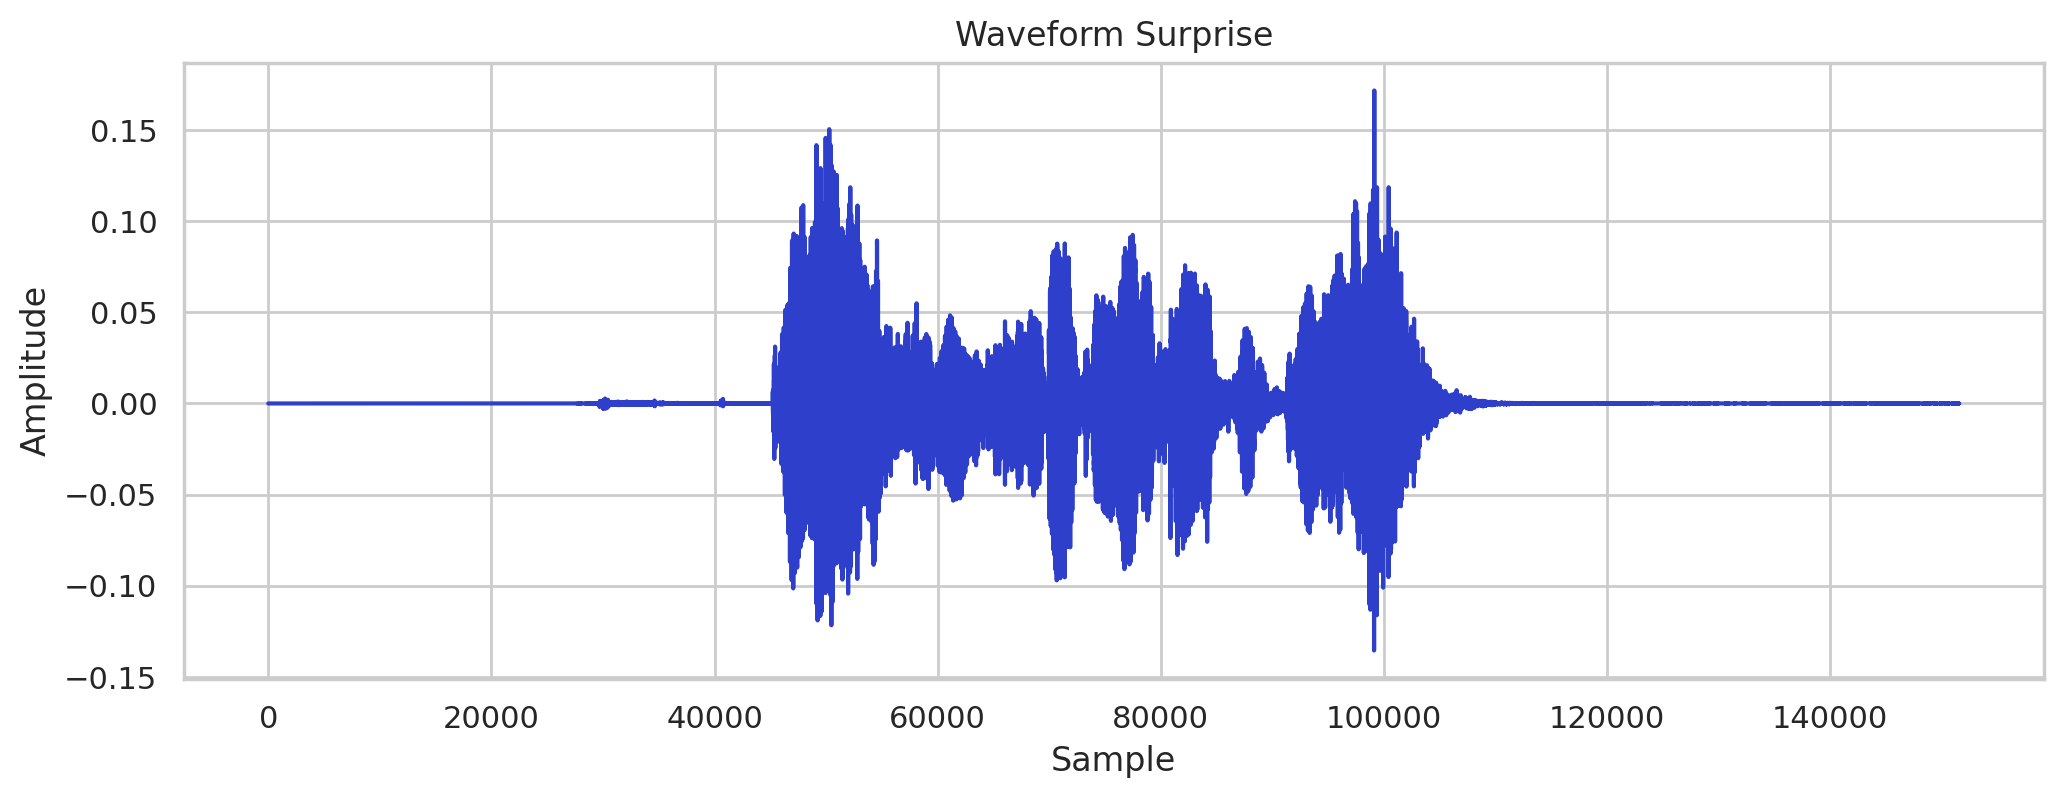

In [40]:
surprise_sp = df[df['Emotions'] == 'surprise']['Path']
surprise_arr = df[df['Emotions'] == 'surprise']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform Surprise' )
plt.show()

Audio(surprise_sp.iloc[0])

# Amplitude Envelope


Represents changes in signal intensity over time.
Captures the rise and fall of energy in speech.
Important when spectral resolution is limited.
###Spectral vs. Amplitude Information
Spectral details identify specific speech sounds.
Amplitude envelope helps track speech rhythm and syllable structure.
###Sample Duration
Defines the time window for analyzing audio data.
Determines how much speech is captured per segment.
Can be adjusted based on the application (e.g., short for phoneme detection, longer for full sentences).

In [41]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [42]:
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.28 seconds


In [43]:
Frame_size = 1024
Hop_lenght = 512


def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []

    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)

    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):

    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [44]:
Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [45]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral),
     len(AE_surprise), len(AE_sad))

256 236 245 216 190 297 184


In [46]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
     len(fancy_AE_surprise), len(fancy_AE_sad))

256 236 245 216 190 297 184


In [47]:
(AE_fear == fancy_AE_fear).all()

np.True_

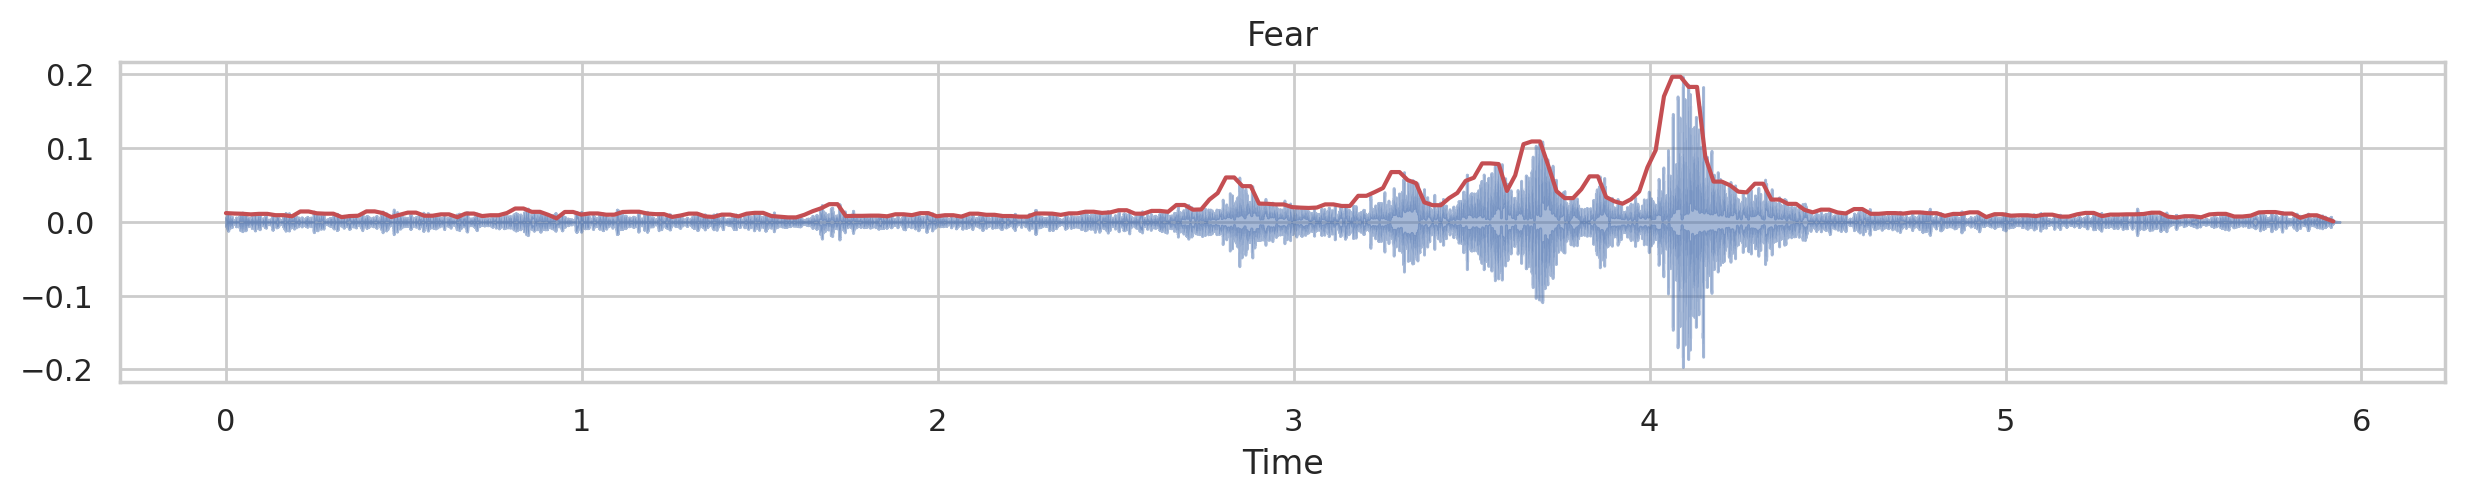

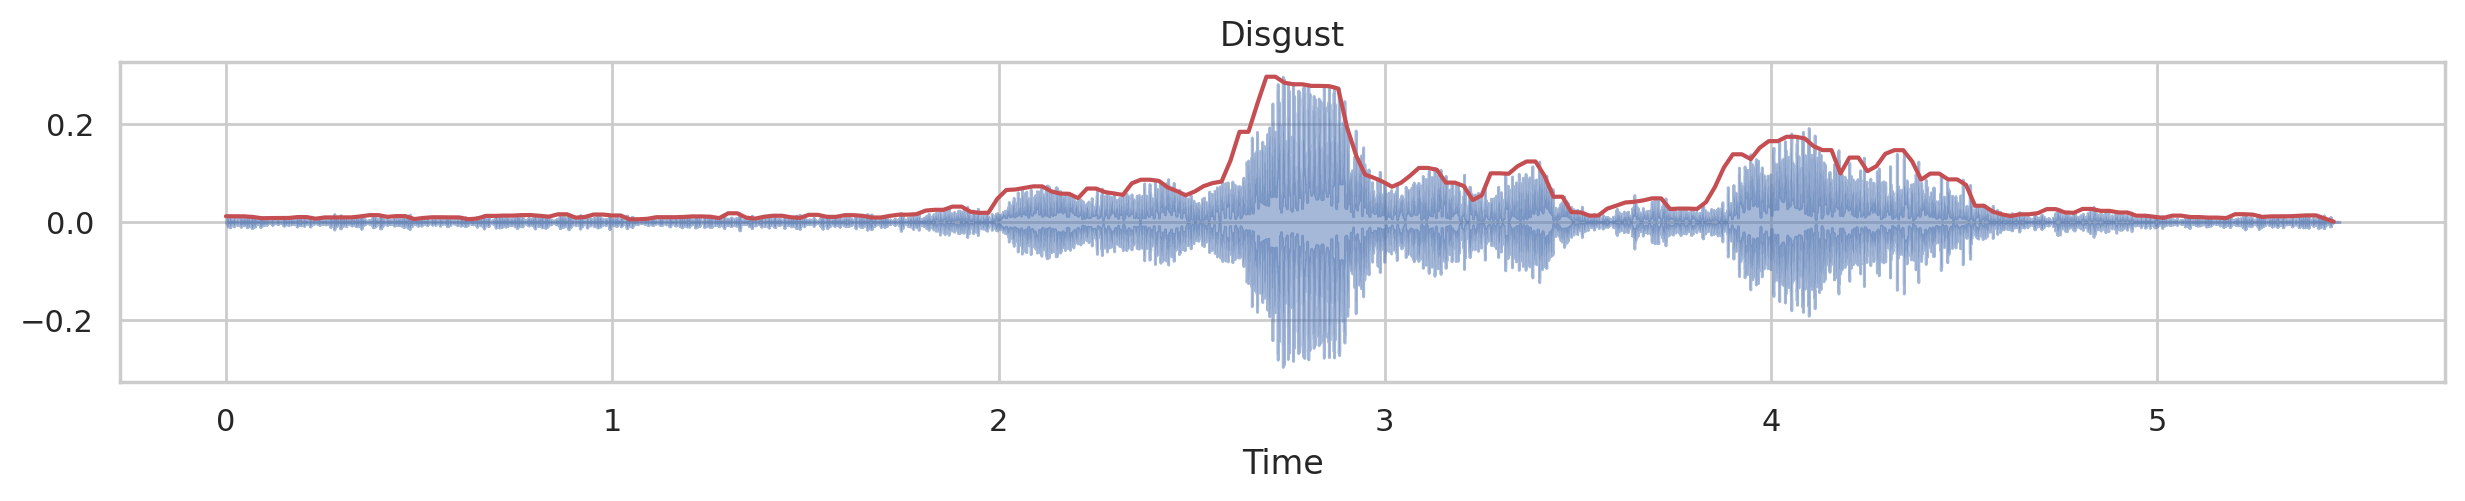

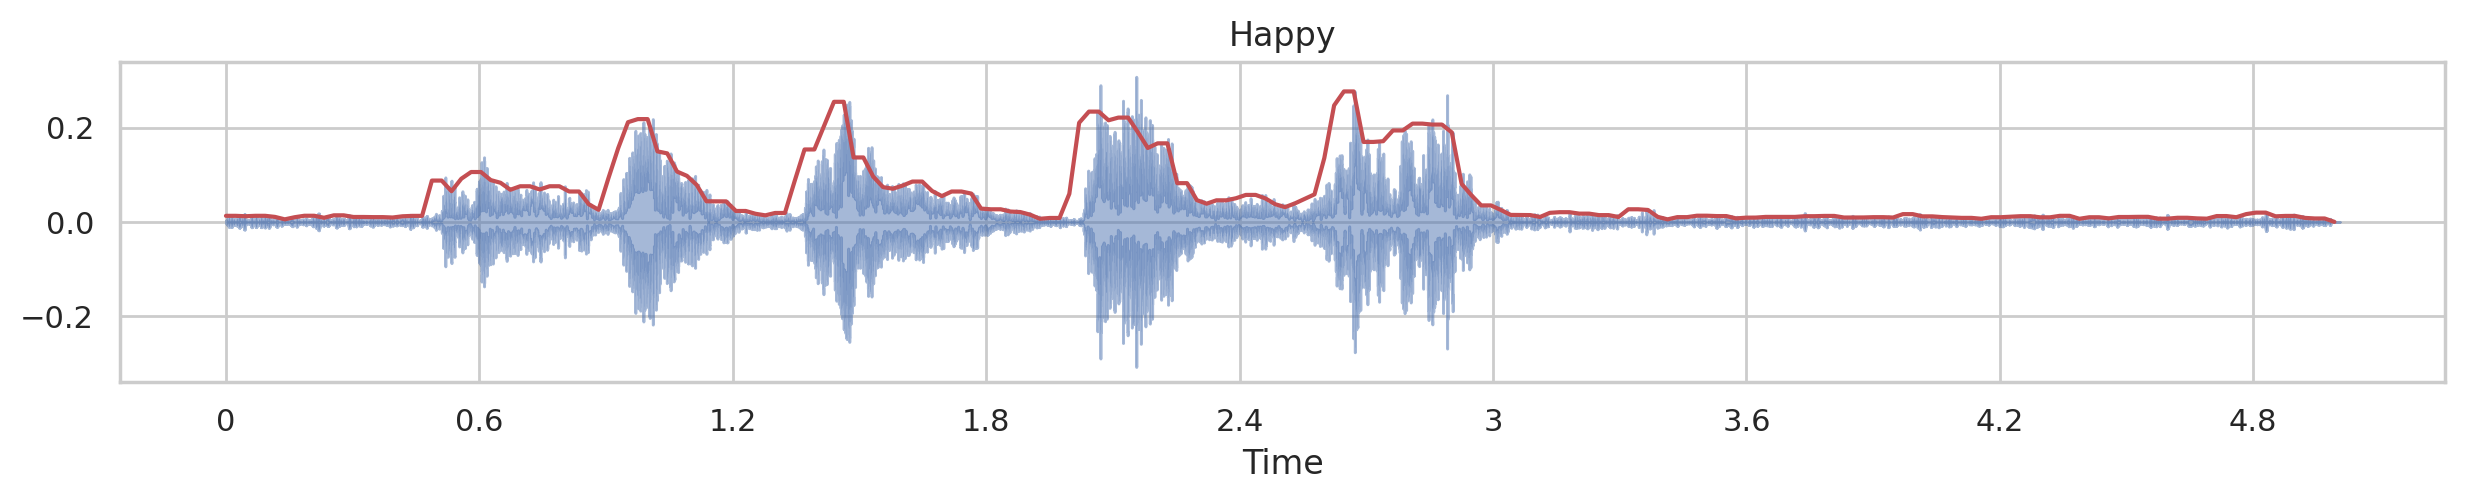

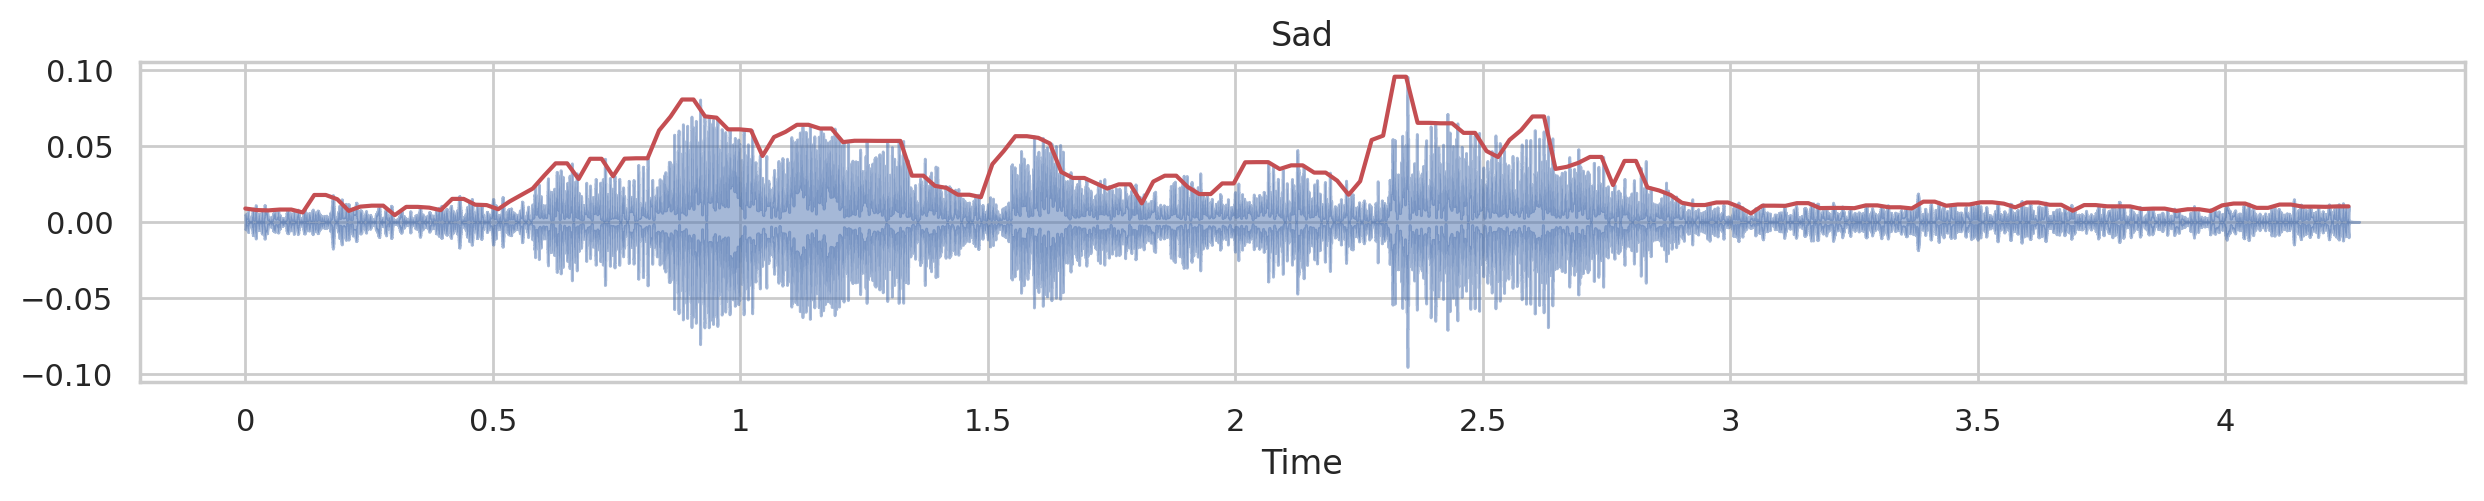

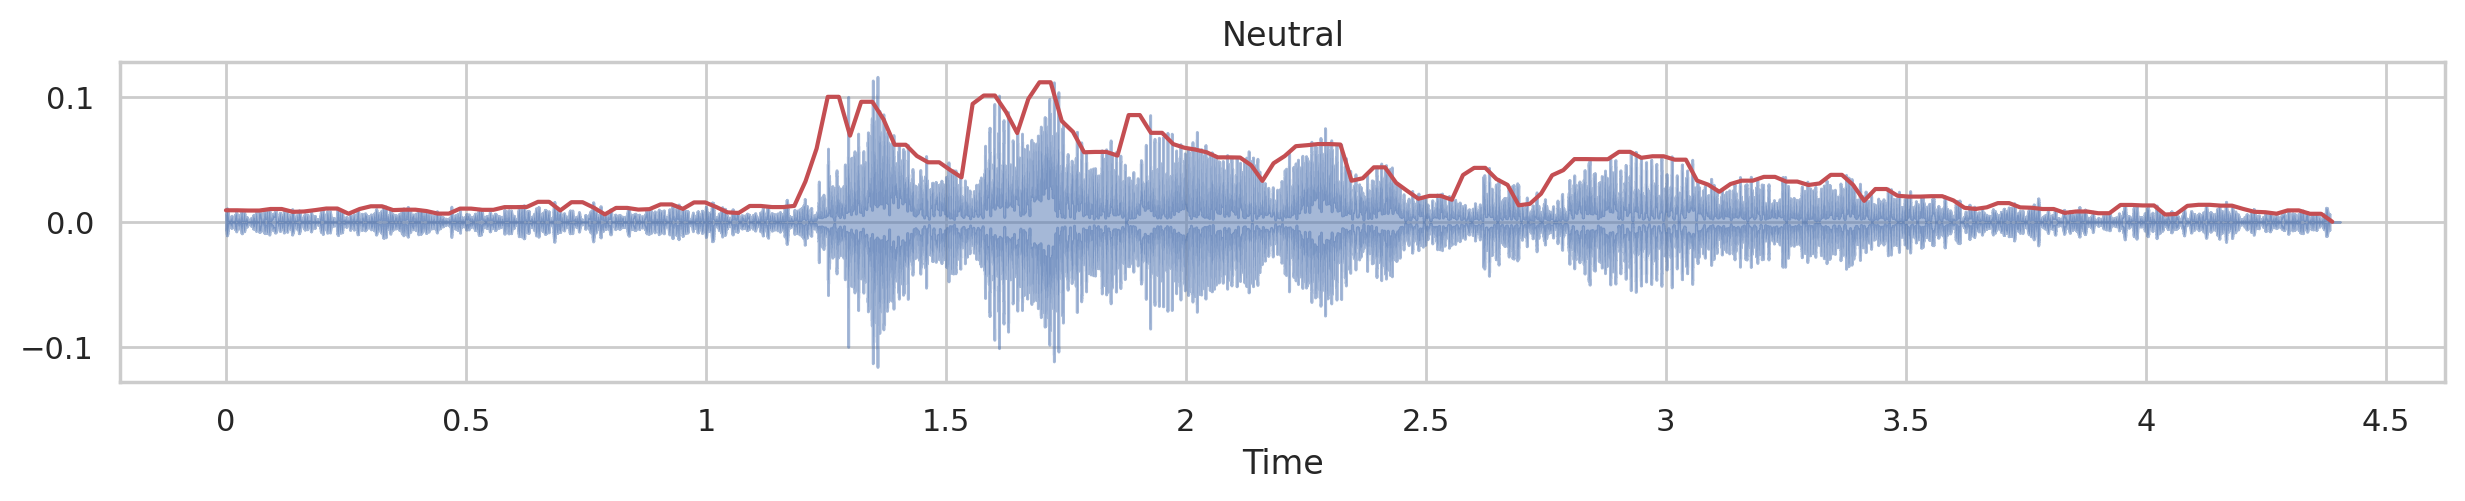

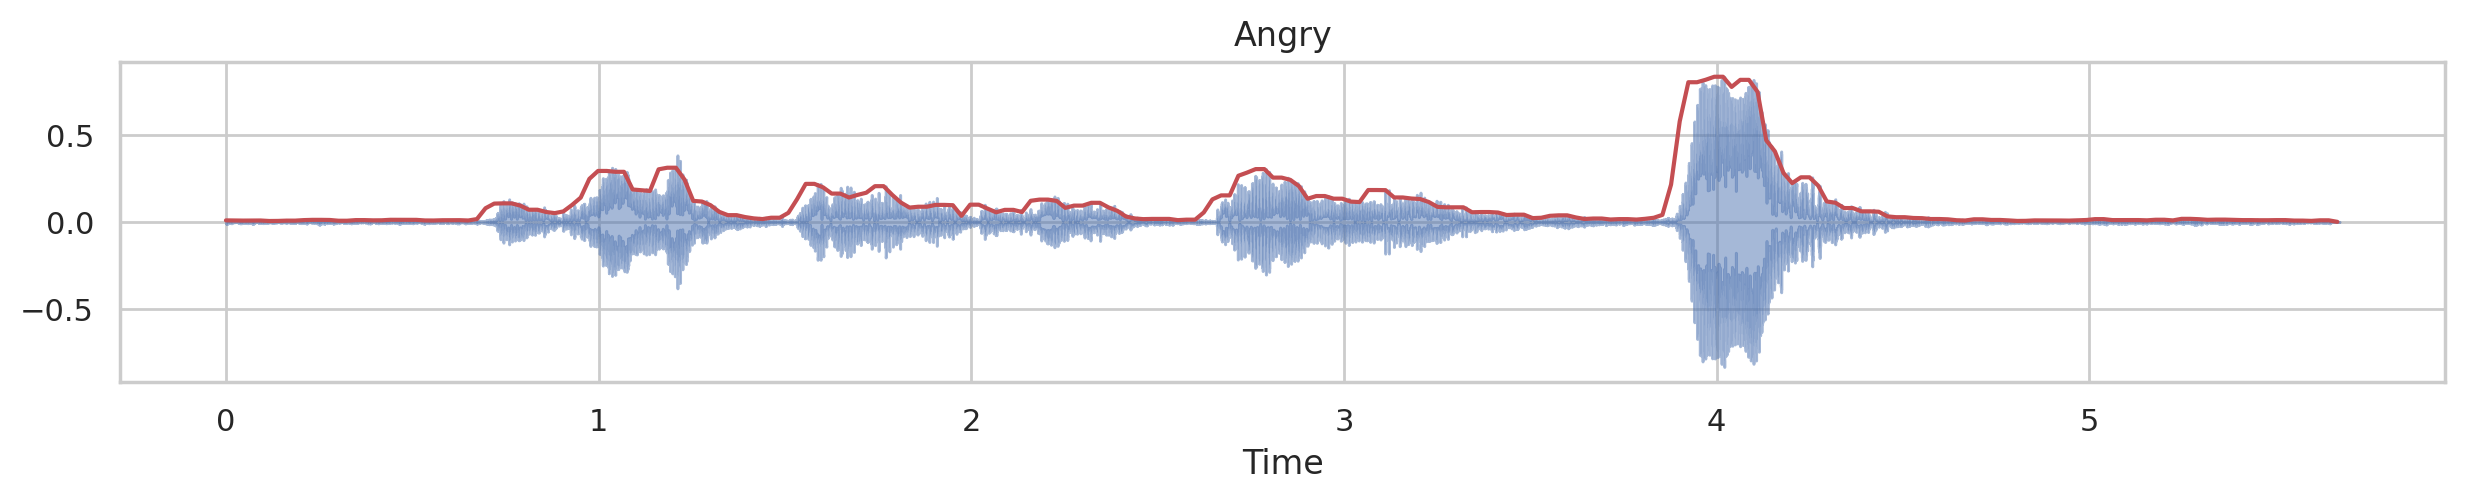

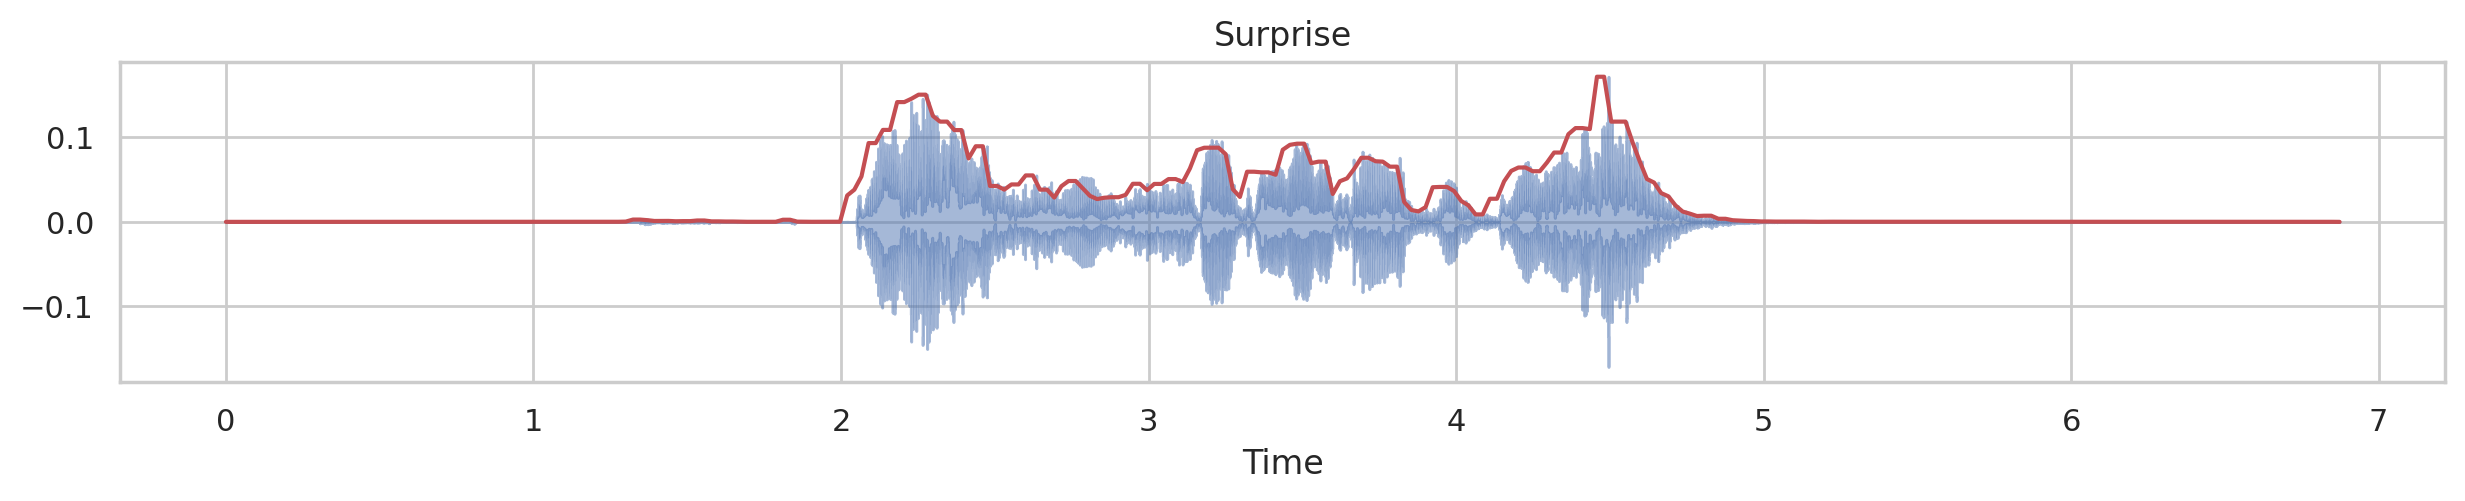

In [48]:
frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear" )
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust" )
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy" )
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad" )
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral" )
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry" )
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise")
plt.show()

## Augmentation

###Why Data Augmentation?
Helps models generalize better to real-world conditions.
Improves robustness against variations in speech and environment.

###Noise Injection
Adds background noise to training samples.
Helps the model perform well in noisy environments.
###Time Stretching
Changes the speed of an audio clip without altering pitch.
Useful for training models to recognize speech at different speeds.

In [49]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.9):
    return librosa.effects.time_stretch(data, rate=0.8)


path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

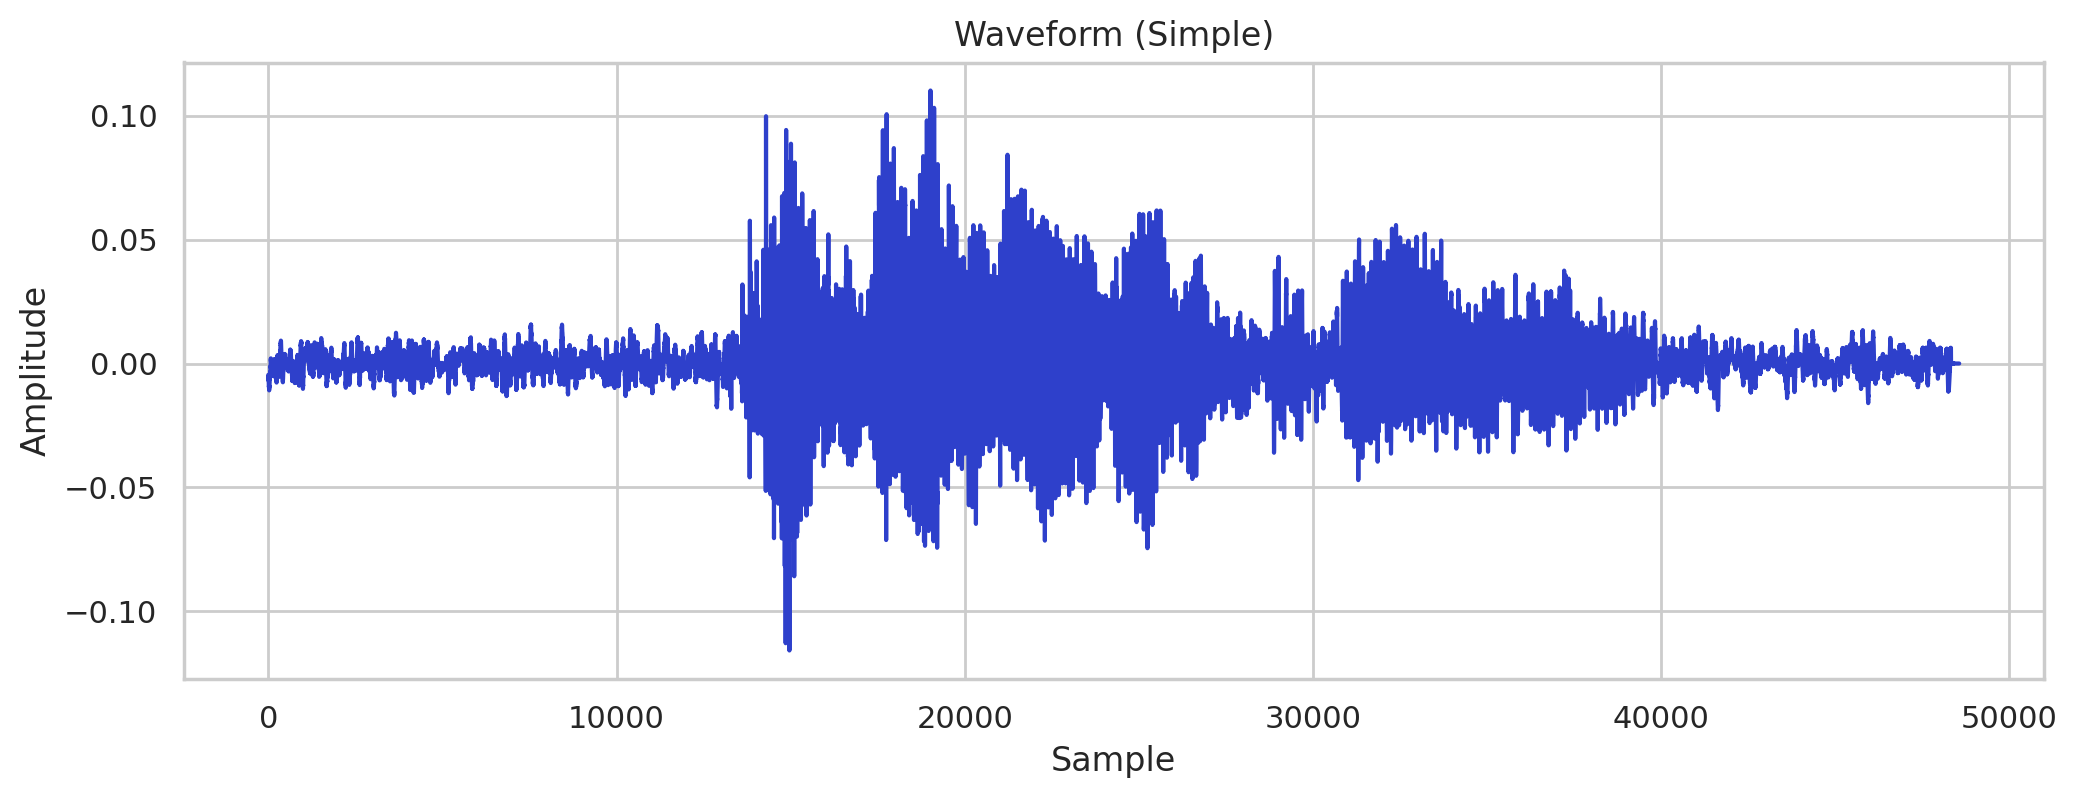

In [50]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform (Simple)' )
plt.show()

Audio(Simple_data, rate=sample_rate)

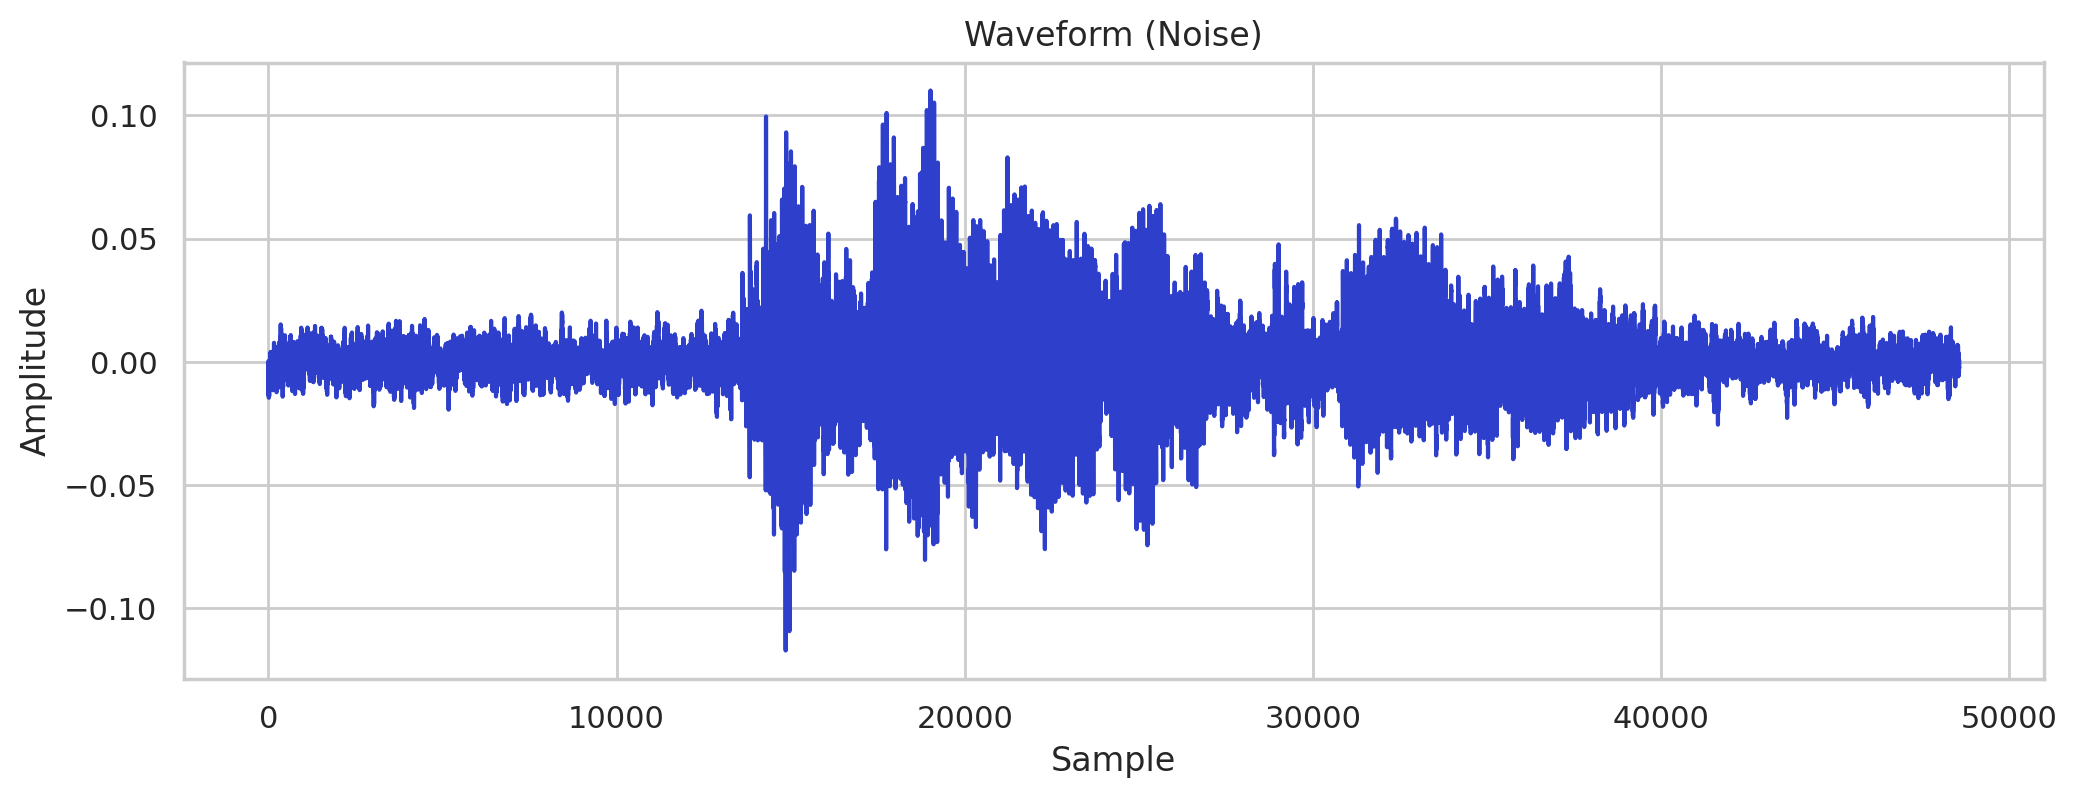

In [51]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample' )
plt.ylabel('Amplitude' )
plt.title('Waveform (Noise)' )
plt.show()

Audio(Noise_data, rate=sample_rate)

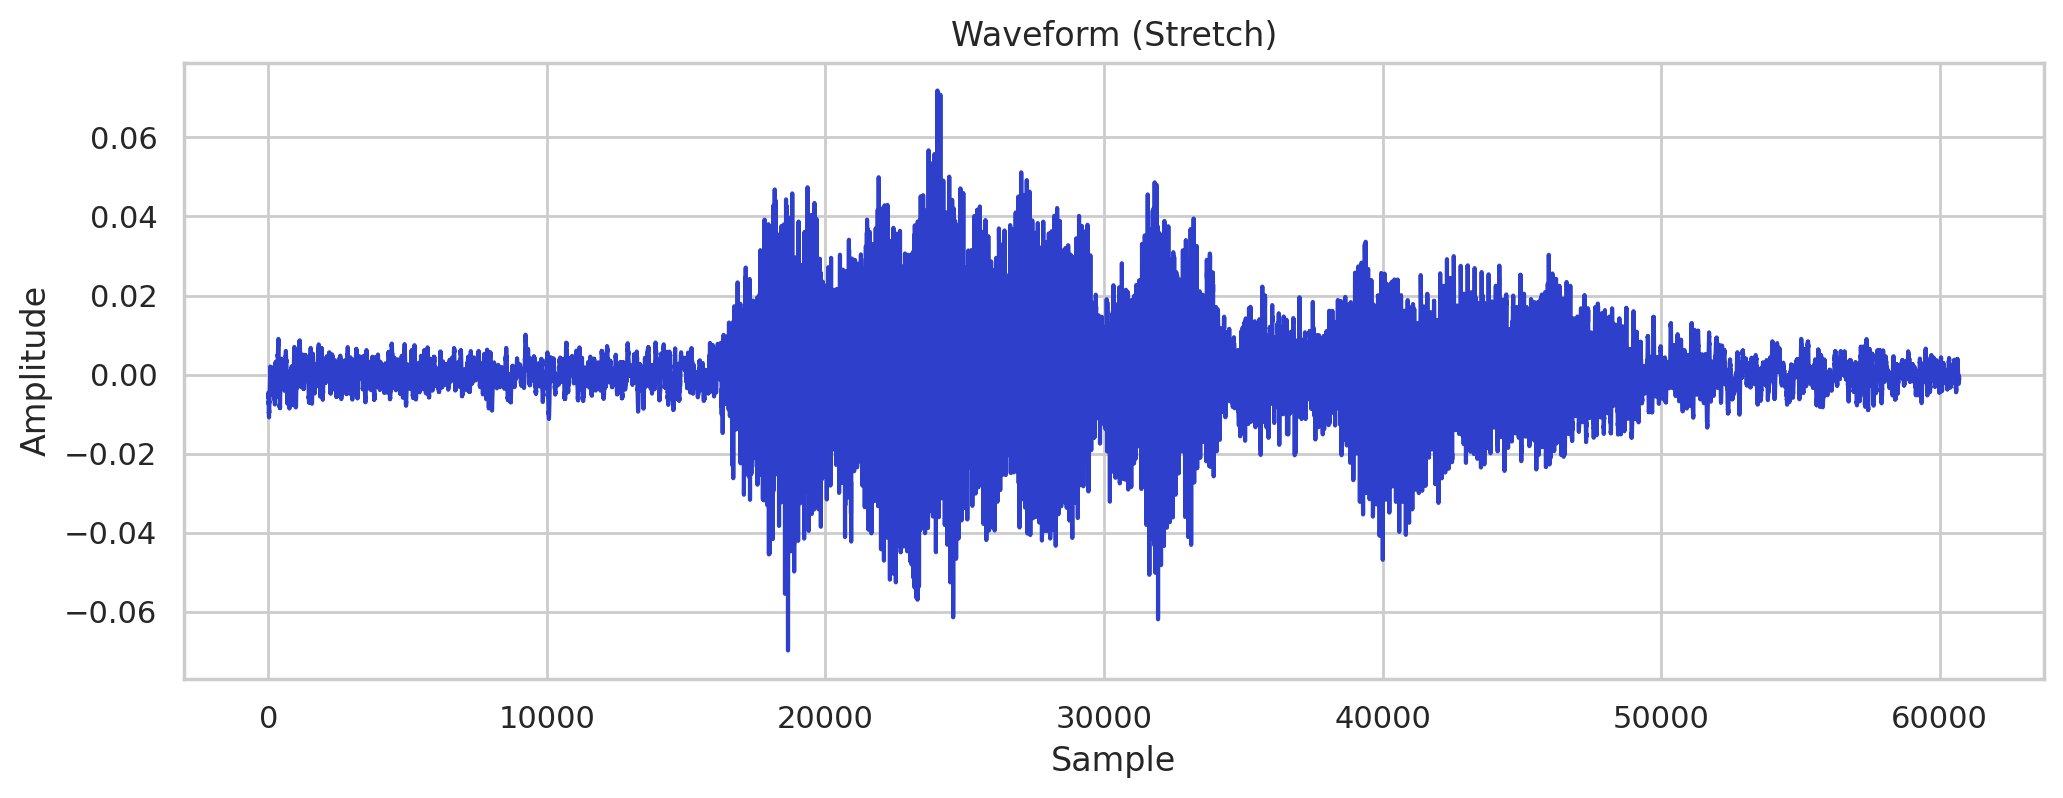

In [52]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude' )
plt.title('Waveform (Stretch)' )
plt.show()

Audio(Stretch_data, rate=sample_rate)


# Data PrePeration

In [53]:
df.head(100)

Emotions                                               Path  \
0     angry  /content/drive/MyDrive/Data/Data_speech/Crema/...   
1   neutral  /content/drive/MyDrive/Data/Data_speech/Crema/...   
2   disgust  /content/drive/MyDrive/Data/Data_speech/Crema/...   
3      fear  /content/drive/MyDrive/Data/Data_speech/Crema/...   
4       sad  /content/drive/MyDrive/Data/Data_speech/Crema/...   
..      ...                                                ...   
95  neutral  /content/drive/MyDrive/Data/Data_speech/Crema/...   
96    angry  /content/drive/MyDrive/Data/Data_speech/Crema/...   
97  neutral  /content/drive/MyDrive/Data/Data_speech/Crema/...   
98  disgust  /content/drive/MyDrive/Data/Data_speech/Crema/...   
99      sad  /content/drive/MyDrive/Data/Data_speech/Crema/...   

                                               Arrays  
0   [-0.0039754175, -0.005030579, -0.004630326, -0...  
1   [-0.0045831124, -0.0060135555, -0.0058593554, ...  
2   [-0.0008605395, -0.0010313885, -0.0008250481, ...  
3   [-0.004953418, -0.0061627156, -0.0055218996, -...  
4   [0.0038057854, 0.0048648017, 0.004395825, 0.00...  
..                                                ...  
95  [0.0021279766, 0.0030752595, 0.0034050276, 0.0...  
96  [0.0050230883, 0.0062991013, 0.005801143, 0.00...  
97  [0.0013302497, 0.0018317518, 0.0018732429, 0.0...  
98  [-0.0013978374, -0.0015286932, -0.0012241523, ...  
99  [-0.007677435, -0.009719528, -0.008846473, -0....  

[100 rows x 3 columns]

In [54]:
from sklearn.model_selection import train_test_split

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['Emotions'], random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['Emotions'], random_state=42)

df.loc[train_df.index, 'split'] = 'train'
df.loc[valid_df.index, 'split'] = 'valid'
df.loc[test_df.index, 'split'] = 'test'


In [55]:
train_df = df[df['split'] == 'train']


In [56]:
train_df.head()

Emotions                                               Path  \
0    angry  /content/drive/MyDrive/Data/Data_speech/Crema/...   
2    angry  /content/drive/MyDrive/Data/Data_speech/Crema/...   
3    angry  /content/drive/MyDrive/Data/Data_speech/Crema/...   
5      sad  /content/drive/MyDrive/Data/Data_speech/audio_...   
6  disgust  /content/drive/MyDrive/Data/Data_speech/Crema/...   

                                              Arrays  split  
0  [0.0010551566, 0.0014415791, 0.001392602, 0.00...  train  
2  [-0.010247498, -0.012238452, -0.010222404, -0....  train  
3  [-0.020269496, -0.02568762, -0.023522578, -0.0...  train  
5  [1.462875e-07, -1.2504788e-07, 1.018211e-07, -...  train  
6  [0.0009889556, 0.0012826459, 0.0012600494, 0.0...  train

## Array and Dimension
###Understanding Arrays in Speech Data
Speech signals are continuous waveforms that need to be converted into numerical arrays for processing.
These arrays store amplitude values over time.
###Expanding Dimensions
Increasing the feature space helps capture more speech characteristics.
Common techniques include adding frequency channels (e.g., spectrograms) or temporal context (e.g., stacking past frames).

In [57]:
def extract_mfcc(filename, max_pad_len=100):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]

    return mfcc.T

In [58]:
X_train = np.array([extract_mfcc(path) for path in df[df['split'] == 'train']['Path']])
X_valid = np.array([extract_mfcc(path) for path in df[df['split'] == 'valid']['Path']])
X_test  = np.array([extract_mfcc(path) for path in df[df['split'] == 'test']['Path']])


In [59]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_train = encoder.fit_transform(df[df['split'] == 'train']['Emotions'])
y_valid = encoder.transform(df[df['split'] == 'valid']['Emotions'])
y_test  = encoder.transform(df[df['split'] == 'test']['Emotions'])

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)


In [60]:
X_train.shape

(9752, 100, 40)

In [61]:
y_train.shape

(9752, 7)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


num_classes = y_train.shape[1]  # One hot encoded, else 7


model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(100, 40))),  # Explicit input shape
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(num_classes, activation='softmax')
])


model.build(input_shape=(None, 100, 40))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0003), metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100, 512)            │         608,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         328,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 970,375 (3.70 MB)

 Trainable params: 970,375 (3.70 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)

In [64]:
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler_callback = LearningRateScheduler(scheduler)

In [65]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=128,
    callbacks=[model_checkpoint_callback,early_stopping, lr_scheduler_callback]
)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2234 - loss: 1.9184
Epoch 1: val_accuracy improved from -inf to 0.43642, saving model to best_model.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.2242 - loss: 1.9170 - val_accuracy: 0.4364 - val_loss: 1.5300 - learning_rate: 3.0000e-04
Epoch 2/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4286 - loss: 1.5064
Epoch 2: val_accuracy improved from 0.43642 to 0.47580, saving model to best_model.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.4294 - loss: 1.5050 - val_accuracy: 0.4758 - val_loss: 1.4083 - learning_rate: 3.0000e-04
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4976 - loss: 1.3453
Epoch 3: val_accuracy improved from 0.47580 to 0.55537, saving model to best_model.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4979 - loss: 1.3447 - val_accuracy: 0.5554 - val_loss: 1.2014 - learning_rate: 3.0000e-04
Epoch 4/50
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/st

In [66]:
model.save("speech_emotion_model.h5")


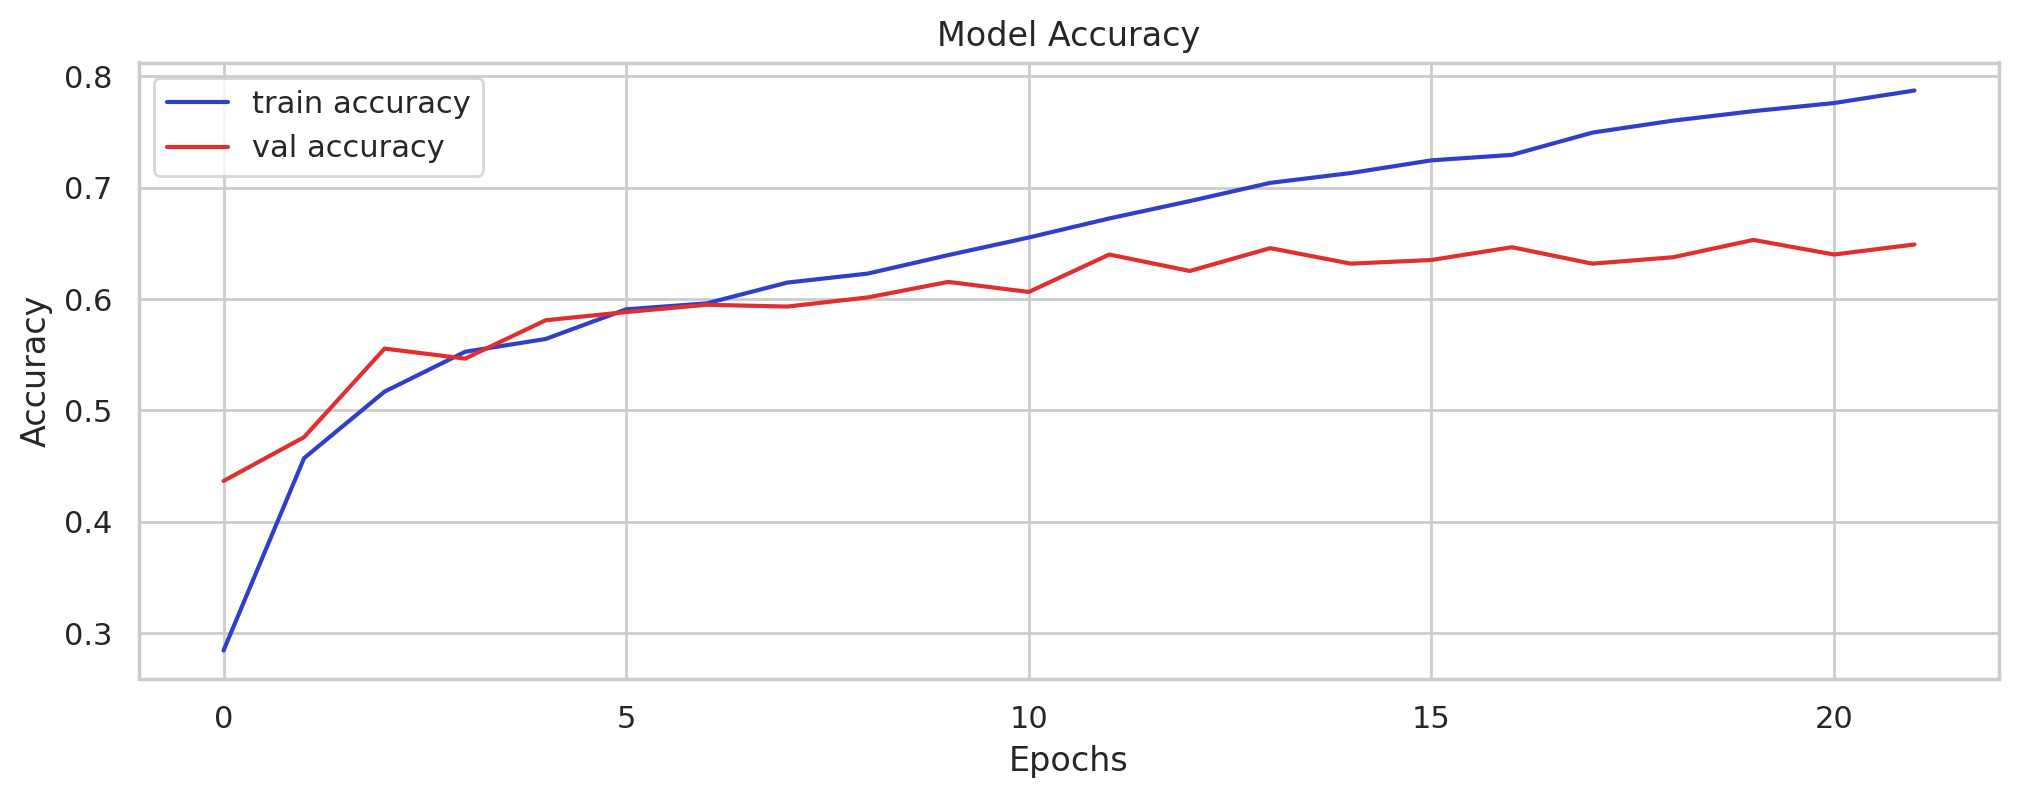

In [67]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(history.history['accuracy'], label='train accuracy', color='#2E40CB')
plt.plot(history.history['val_accuracy'], label='val accuracy', color='#E12E2E')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()



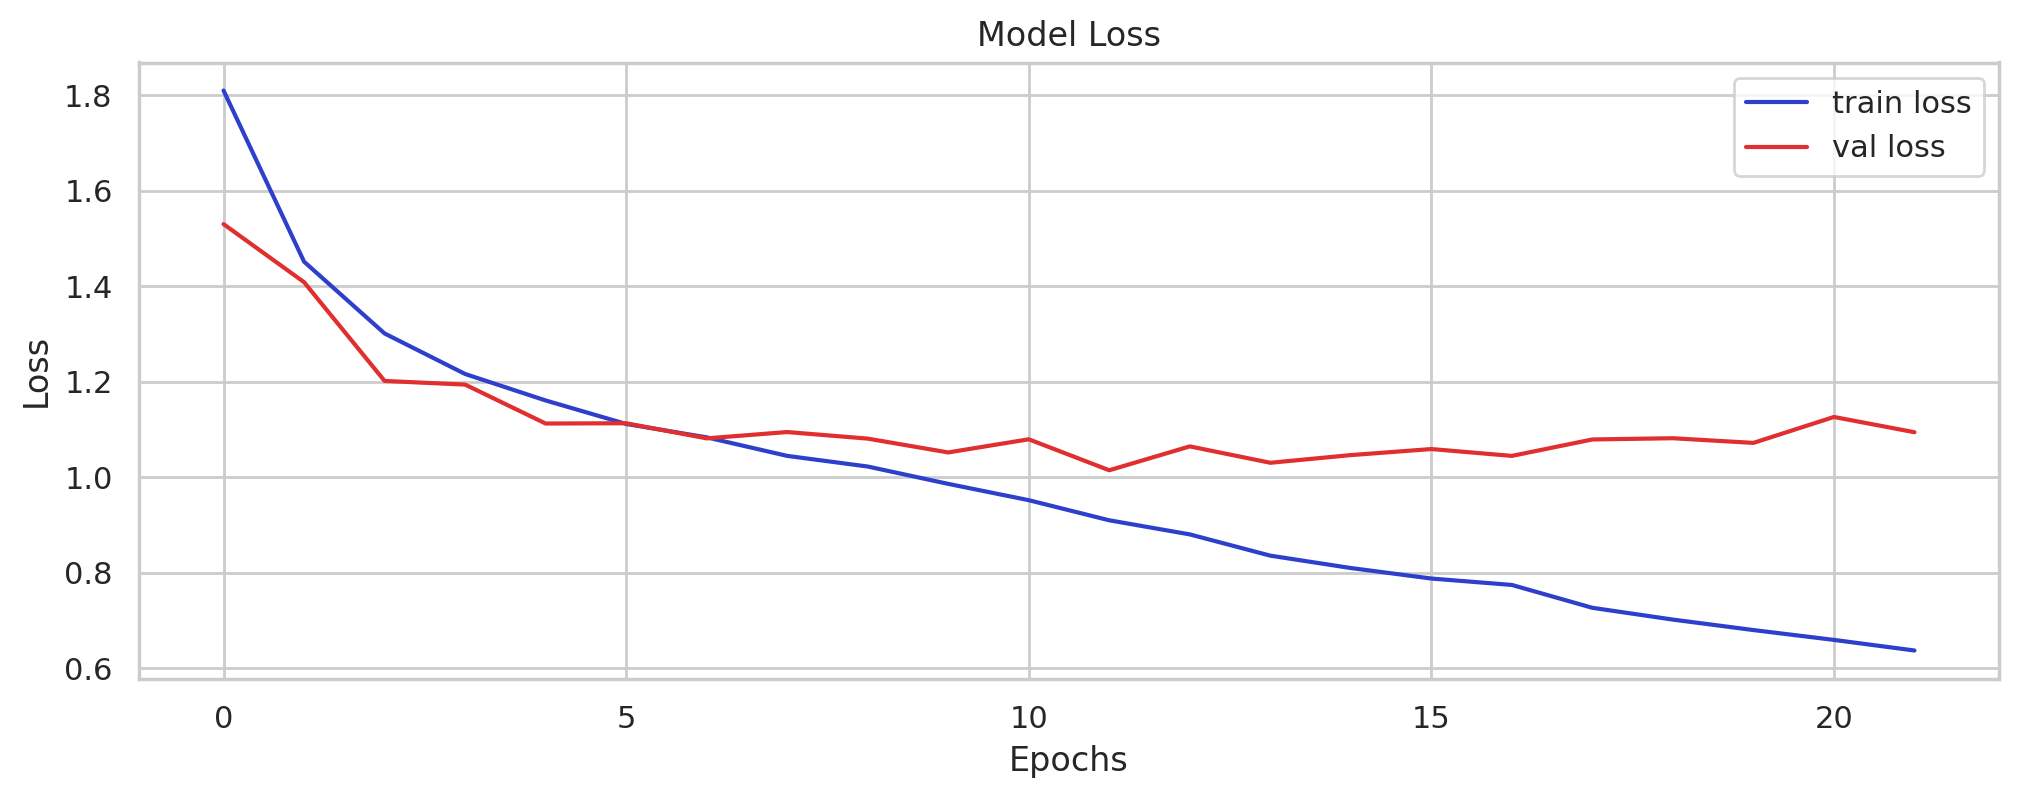

In [68]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(history.history['loss'], label='train loss', color='#2E40CB')
plt.plot(history.history['val_loss'], label='val loss', color='#E12E2E')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()